<a href="https://colab.research.google.com/github/PilouZer/PilouZer/blob/main/AilyLabs_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np                    # Data manipulation 
from matplotlib import pyplot as plt                # Graphing
import seaborn as sns                               # Graphing
import plotly.express as px                         # Graphing
import statsmodels.api as sm                        # Statistical analysis
sns.set(style="white")                              # Tuning the style of charts
import warnings                                     # Disable some warnings
warnings.filterwarnings("ignore")
from scipy import stats                             # Stats
pd.set_option('display.max_rows', 1000)             # Change viewing options for rows
pd.set_option('display.max_columns', 50)            # Change viewing options for rows
from sklearn.ensemble import RandomForestClassifier # first base model
from sklearn.model_selection import GridSearchCV    # hyperparameter tuning 
from sklearn.compose import ColumnTransformer       # column transformer
from sklearn.preprocessing import StandardScaler    # scaler
from sklearn.preprocessing import OneHotEncoder     # encoder
from sklearn.decomposition import PCA               # PCA
from sklearn.metrics import roc_auc_score, recall_score, precision_score  # used for cross-validation on our validation set 
from sklearn.svm import SVC                         # SupportVectorClassifier
from sklearn.model_selection import train_test_split# splitting data into training and into validation set
from sklearn.linear_model import LogisticRegression # Logistic Regression 
import xgboost as xgb                               # XGBClassifier
from sklearn.metrics import brier_score_loss        # brier metric to evaluate models
import plotly.graph_objects as go                   # import to show ROC curve
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.utils import resample

### Loading Data

In [ ]:
train_data = pd.read_csv("aily_case_training_data.csv")
train_output = pd.read_csv("aily_case_training_output.csv")
train_hist = pd.read_csv("aily_case_training_hist_data.csv")

test_data = pd.read_csv("aily_case_test_data.csv")
test_output = pd.read_csv("aily_case_test_output_template.csv")
test_hist = pd.read_csv("aily_case_test_hist_data.csv")

In [ ]:
train_data.head()

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power
0,d07d473503c6bef7cf1922fab1f88f3e,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1577,0,0,2010-01-05,2016-12-12,NaN,2015-11-01,2015-12-14,NaN,NaN,NaN,NaN,113.189528,0.000000,0.0,9.533935,0.179799,0.000000,29.744311,f,0.000000,40.484555,36.606656,1,9.790569,6,lxidpiddsbxsbosboudacockeimpuepw,13.009751
1,79e38c743a89ad6b950ae6136bbaeb2b,ixuciffexbsibwibpcwdmfwcoixkfscw,NaN,foosdfpfkusacimwkcsosbicdxkicaua,280731,0,16856,2009-11-04,2016-11-04,NaN,2009-11-04,2015-11-05,NaN,NaN,NaN,NaN,12910.745989,20467.614893,0.0,248.193187,0.139908,0.049123,27.257522,f,1440.595633,-28.777615,-26.021090,1,872.951153,6,lxidpiddsbxsbosboudacockeimpuepw,125.190059
2,6f6a16ed39fd75715b1acc656c749f83,fmwdwsxillemwbbwelxsampiuwwpcdcb,NaN,foosdfpfkusacimwkcsosbicdxkicaua,99223,189585,4783,2013-02-16,2016-02-16,NaN,2013-02-16,2015-02-18,NaN,NaN,NaN,NaN,622.245387,0.000000,0.0,81.197343,0.151782,0.053042,27.257522,t,0.000000,61.939503,56.006496,2,55.939033,3,lxidpiddsbxsbosboudacockeimpuepw,19.949036
3,1d8e17bf13218e671e968871e0c6373f,afeccskfmobewicibxofslkxecsuekfi,NaN,foosdfpfkusacimwkcsosbicdxkicaua,10381,0,0,2012-01-25,2017-01-25,NaN,2015-12-16,2016-01-26,NaN,NaN,NaN,NaN,525.026971,0.000000,0.0,89.052476,0.151063,0.052747,27.257522,f,0.000000,94.215208,85.190604,2,53.813449,4,lxidpiddsbxsbosboudacockeimpuepw,30.356086
4,2c195164c61eeb0edee79688790f3dda,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6107,0,0,2011-11-12,2016-11-12,2011-11-12,2015-09-20,2015-11-13,0.0,0.0,983.785888,0.0,156.718305,0.000000,0.0,12.829360,0.180165,0.000000,31.082797,f,0.000000,43.562873,39.390111,1,11.044119,4,lxidpiddsbxsbosboudacockeimpuepw,17.338823


In [ ]:
train_output.head()

,contract_id,has_churned_over_next_3m
0,6975aab29f35173b43eae4f595b747c7,0
1,8073016b742f47cf4c76cc41dc410122,1
2,227c0e6b15256a1d3d3460e15c24ba60,0
3,e1ea0597bbad7bfd95adf1c7103bfda1,0
4,a2e017f297f2557a7b1cf4a92bc993e9,0


In [ ]:
train_hist.head()

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,cd7ad4a23c39fd588bf326333786300c,2015-02-01,0.136157,0.000000,0.0,39.926856,0.0,0.0
1,73c63df734c0948948b61dcab3153dce,2015-06-01,0.134560,0.000000,0.0,39.926855,0.0,0.0
2,75d7981514dd168b8ca9954c62342426,2015-03-01,0.153324,0.067422,0.0,39.926856,0.0,0.0
3,3d4e8ae29da9e25cf77dd6966ff8c02e,2015-09-01,0.133067,0.000000,0.0,39.926855,0.0,0.0
4,5c8b795e6ff043528535ef4060416db3,2015-04-01,0.137101,0.000000,0.0,39.926855,0.0,0.0


### Merge Dataframes

Here I will merge the training output and the training data and do the same for the test to have the target and features in the same dataframe.

In [ ]:
data = pd.merge(train_data, train_output, on='contract_id')

In [ ]:
data.head()

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
0,d07d473503c6bef7cf1922fab1f88f3e,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1577,0,0,2010-01-05,2016-12-12,NaN,2015-11-01,2015-12-14,NaN,NaN,NaN,NaN,113.189528,0.000000,0.0,9.533935,0.179799,0.000000,29.744311,f,0.000000,40.484555,36.606656,1,9.790569,6,lxidpiddsbxsbosboudacockeimpuepw,13.009751,1
1,79e38c743a89ad6b950ae6136bbaeb2b,ixuciffexbsibwibpcwdmfwcoixkfscw,NaN,foosdfpfkusacimwkcsosbicdxkicaua,280731,0,16856,2009-11-04,2016-11-04,NaN,2009-11-04,2015-11-05,NaN,NaN,NaN,NaN,12910.745989,20467.614893,0.0,248.193187,0.139908,0.049123,27.257522,f,1440.595633,-28.777615,-26.021090,1,872.951153,6,lxidpiddsbxsbosboudacockeimpuepw,125.190059,0
2,6f6a16ed39fd75715b1acc656c749f83,fmwdwsxillemwbbwelxsampiuwwpcdcb,NaN,foosdfpfkusacimwkcsosbicdxkicaua,99223,189585,4783,2013-02-16,2016-02-16,NaN,2013-02-16,2015-02-18,NaN,NaN,NaN,NaN,622.245387,0.000000,0.0,81.197343,0.151782,0.053042,27.257522,t,0.000000,61.939503,56.006496,2,55.939033,3,lxidpiddsbxsbosboudacockeimpuepw,19.949036,0
3,1d8e17bf13218e671e968871e0c6373f,afeccskfmobewicibxofslkxecsuekfi,NaN,foosdfpfkusacimwkcsosbicdxkicaua,10381,0,0,2012-01-25,2017-01-25,NaN,2015-12-16,2016-01-26,NaN,NaN,NaN,NaN,525.026971,0.000000,0.0,89.052476,0.151063,0.052747,27.257522,f,0.000000,94.215208,85.190604,2,53.813449,4,lxidpiddsbxsbosboudacockeimpuepw,30.356086,0
4,2c195164c61eeb0edee79688790f3dda,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6107,0,0,2011-11-12,2016-11-12,2011-11-12,2015-09-20,2015-11-13,0.0,0.0,983.785888,0.0,156.718305,0.000000,0.0,12.829360,0.180165,0.000000,31.082797,f,0.000000,43.562873,39.390111,1,11.044119,4,lxidpiddsbxsbosboudacockeimpuepw,17.338823,0


# EDA / Statistical Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   contract_id                          16096 non-null  object 
 1   company_category                     6551 non-null   object 
 2   campaing_code_elect                  0 non-null      float64
 3   channel                              11878 non-null  object 
 4   elect_cons_at_12m                    16096 non-null  int64  
 5   gas_cons_at_12m                      16096 non-null  int64  
 6   elect_cons_last_month                16096 non-null  int64  
 7   contract_activation_date             16096 non-null  object 
 8   contract_end_date                    16094 non-null  object 
 9   contract_fist_act_date               3508 non-null   object 
 10  contract_last_mod_date               15939 non-null  object 
 11  contract_renewal_date       

## Checking the number of unique values per column

In [ ]:
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}:  {unique_values}")

contract_id:  16096
company_category:  419
campaing_code_elect:  0
channel:  7
elect_cons_at_12m:  12002
gas_cons_at_12m:  2224
elect_cons_last_month:  4640
contract_activation_date:  1961
contract_end_date:  371
contract_fist_act_date:  1133
contract_last_mod_date:  2307
contract_renewal_date:  398
fcst_bill_baseline_elect_next_month:  2042
fcst_bill_baseline_elect_cal_year:  2042
fcst_bill_baseline_elect_12m:  3429
fcst_consumption_elect_next_month:  1955
fcst_consumption_elect_12m:  15422
fcst_consumption_elect_cal_year:  4895
fcst_current_discount:  14
fcst_bill_meter_rent_12m:  3938
fcst_price_period_1:  617
fcst_price_period_2:  412
fcst_price_power_period_1:  46
client_got_gas:  2
current_paid_consumption:  8765
gross_margin_power_elect:  2979
net_margin_power_elect:  3006
number_active_products:  11
total_net_margin:  13189
customer_antiquity_in_years:  15
code_elect_campaign_first_subs:  5
subscribed_power:  867
has_churned_over_next_3m:  2


## Checking Null Values

In [ ]:
# This code helps to check which columns have null values and returns the number of null values
# It also appends the names of cateogircal and numerical columns without null values to make it easier 
# later on to check distributions of numerical features and how categorical features are spread regarding
# to the target
not_null_col = []
null_col = []
for column in data.columns:
    if data[column].isnull().sum()>0:
        null_col.append(column)
        print(f'{column} null values: {data[column].isnull().sum()}')
    else:
        not_null_col.append(column)

company_category null values: 9545
campaing_code_elect null values: 16096
channel null values: 4218
contract_end_date null values: 2
contract_fist_act_date null values: 12588
contract_last_mod_date null values: 157
contract_renewal_date null values: 40
fcst_bill_baseline_elect_next_month null values: 12588
fcst_bill_baseline_elect_cal_year null values: 12588
fcst_bill_baseline_elect_12m null values: 12588
fcst_consumption_elect_next_month null values: 12588
fcst_current_discount null values: 126
fcst_price_period_1 null values: 126
fcst_price_period_2 null values: 126
fcst_price_power_period_1 null values: 126
gross_margin_power_elect null values: 13
net_margin_power_elect null values: 13
total_net_margin null values: 15
code_elect_campaign_first_subs null values: 87
subscribed_power null values: 3


In [ ]:
not_null_col

['contract_id',
 'elect_cons_at_12m',
 'gas_cons_at_12m',
 'elect_cons_last_month',
 'contract_activation_date',
 'fcst_consumption_elect_12m',
 'fcst_consumption_elect_cal_year',
 'fcst_bill_meter_rent_12m',
 'client_got_gas',
 'current_paid_consumption',
 'number_active_products',
 'customer_antiquity_in_years',
 'has_churned_over_next_3m']

### Check distribution of numerical data without null values

In [ ]:
# these are the numerical columns without null values
not_null_col
# I will remove the target variable 'has_churned_over_next_3m' as it is the target and is actually categorical
# and I will also remove the contract_id column as it is just an identifier and does not contain actual value
not_null_col = not_null_col[1:-1]
# here I remove the 'contract_activation_date' feature as for now I will not deal with date features
not_null_col.remove('contract_activation_date')

In [ ]:
not_null_col

['elect_cons_at_12m',
 'gas_cons_at_12m',
 'elect_cons_last_month',
 'fcst_consumption_elect_12m',
 'fcst_consumption_elect_cal_year',
 'fcst_bill_meter_rent_12m',
 'client_got_gas',
 'current_paid_consumption',
 'number_active_products',
 'customer_antiquity_in_years']

In [ ]:
#1
data['elect_cons_at_12m'].value_counts().head(10)

0          126
3385063     28
6250197     25
3909565     24
4711995     23
7289066     19
3661628     19
4610412     19
2046851     18
2687806     18
Name: elect_cons_at_12m, dtype: int64

In [ ]:
#1
px.histogram(data['elect_cons_at_12m'], title=f'Histogram of elect_cons_at_12m')

<Axes: xlabel='has_churned_over_next_3m', ylabel='elect_cons_at_12m'>

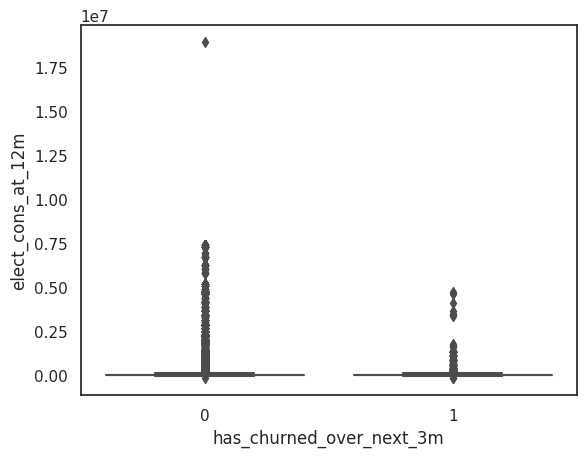

In [ ]:
#1
sns.boxplot(data=data, y=data['elect_cons_at_12m'], x='has_churned_over_next_3m')

It seems the electricity consumptions at 12 months is left skewed and will have to go through some sort of normalization if I try distance based models (Logit regression, SVC). It also seems there are a lot of outliers when looking at the boxplot. It also indicates 50% of this feature's data is very close to each other. Next we will check for negative values. 

In [ ]:
data.loc[data['elect_cons_at_12m']<0]

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
261,6f7c25ec185db87d3682c7c6c5d0325f,NaN,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,-469,0,104,2010-05-24,2016-03-16,NaN,2010-05-24,2015-03-17,NaN,NaN,NaN,NaN,46.085965,128.098615,0.0,9.506300,0.203949,0.042976,29.744311,f,11.318130,36.939824,33.401464,1,9.795524,6,lxidpiddsbxsbosboudacockeimpuepw,13.009751,0
1234,0eebe1192761850edc092783498f3a81,NaN,NaN,NaN,-22385,0,0,2009-04-21,2016-12-31,NaN,2014-02-07,2016-01-01,NaN,NaN,NaN,NaN,-825.321217,0.000000,0.0,235.771438,0.116578,0.044280,39.720589,f,0.000000,0.186565,0.168694,1,0.000000,7,ldkssxwpmemidmecebumciepifcamkci,75.114036,0
1399,33022492eaff6f16e58d73110dca08e1,NaN,NaN,NaN,-3231,15,2071,2009-10-22,2016-10-22,NaN,2009-10-22,2015-10-23,NaN,NaN,NaN,NaN,-145.663557,2515.638761,0.0,15.005584,0.210686,0.045331,30.413554,t,217.974430,22.823090,20.636932,2,41.530644,6,ldkssxwpmemidmecebumciepifcamkci,13.009751,0
1558,d9207ee16592011253eef1bad33e3646,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,-408,1224,0,2012-06-18,2016-06-18,NaN,2012-06-18,2015-06-23,NaN,NaN,NaN,NaN,-29.503843,0.000000,0.0,10.846578,0.183733,0.000000,29.744311,t,0.000000,37.934836,34.301167,3,1.768843,4,lxidpiddsbxsbosboudacockeimpuepw,18.778509,1
1637,12fb0ca38d63207bc45a868be7e3529d,mpicaaibskkfmxoblmwwwuuwpkecacil,NaN,foosdfpfkusacimwkcsosbicdxkicaua,-1611,0,0,2012-05-24,2016-05-24,2012-05-24,2012-05-24,2015-05-31,0.0,0.0,356.182310,0.0,-116.397329,0.000000,0.0,12.836268,0.183733,0.000000,29.744311,f,0.000000,37.965930,34.329283,1,0.406289,4,lxidpiddsbxsbosboudacockeimpuepw,16.525088,0
1668,ed77f450b7a790811a1834bdf49e7126,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,-21086,0,0,2011-04-27,2016-04-27,2011-04-27,2011-04-27,2015-04-28,0.0,0.0,-3062.455913,0.0,-1630.790279,0.000000,0.0,11.240371,0.182713,0.000000,29.744311,f,0.000000,33.395093,30.196273,1,19.031163,5,lxidpiddsbxsbosboudacockeimpuepw,13.009751,0
1750,93ea615efecd4f2e3b5740cc70adc469,NaN,NaN,NaN,-808,1302,0,2009-11-10,2016-03-06,NaN,2014-03-06,2015-03-09,NaN,NaN,NaN,NaN,-54.911659,0.000000,0.0,12.166130,0.179136,0.000000,29.744311,t,0.000000,50.636787,45.786435,2,5.930826,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,16.525088,0
2442,3faa5afa12c8f6e068f8ae9c05867e5d,NaN,NaN,NaN,-147112,0,0,2008-07-01,2016-12-31,NaN,2013-09-11,2016-01-01,NaN,NaN,NaN,NaN,-5678.638356,0.000000,0.0,228.365367,0.116578,0.044280,39.720589,f,0.000000,0.373130,0.337389,1,0.000000,8,ldkssxwpmemidmecebumciepifcamkci,160.243276,1
2884,ca4a3b563abd6dc9f57758d79db37540,almlfkoedpwfdmmsebsdwueskducuiok,NaN,NaN,-408,0,0,2010-01-06,2016-03-19,NaN,2014-05-09,NaN,NaN,NaN,NaN,NaN,-27.088092,0.000000,0.0,13.223153,0.182713,0.000000,29.744311,f,0.000000,36.939824,33.401464,1,15.562843,6,lxidpiddsbxsbosboudacockeimpuepw,13.009751,0
3498,5f3bdc07e24de8179b8747d3586c6835,NaN,NaN,NaN,-10031,0,0,2010-05-26,2016-05-26,NaN,2010-05-26,2015-05-31,NaN,NaN,NaN,NaN,-1053.991559,0.000000,0.0,11.779245,0.210514,0.045973,29.744311,f,0.000000,29.850363,26.991082,1,30.808583,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.009751,0


Here we will remove the negative values as it does not make sense for an electricity consumption to be negative. There might be exceptions to this if the energy company has a policy or program that allows for energy consumers to also be producers (for instance, if they have solar panels and feed surplus energy back into the grid). In this case I will assume they are not.  

In [ ]:
data = data.loc[data['elect_cons_at_12m']>=0]

In [ ]:
#2
data['gas_cons_at_12m'].value_counts().head(10)

0          13149
499337        28
470972        25
443710        24
121506        23
239445        19
21232         19
1001704       19
609602        17
243047        16
Name: gas_cons_at_12m, dtype: int64

In [ ]:
#2
px.histogram(data['gas_cons_at_12m'], title=f'Histogram of gas_cons_at_12m' )

<Axes: xlabel='has_churned_over_next_3m', ylabel='gas_cons_at_12m'>

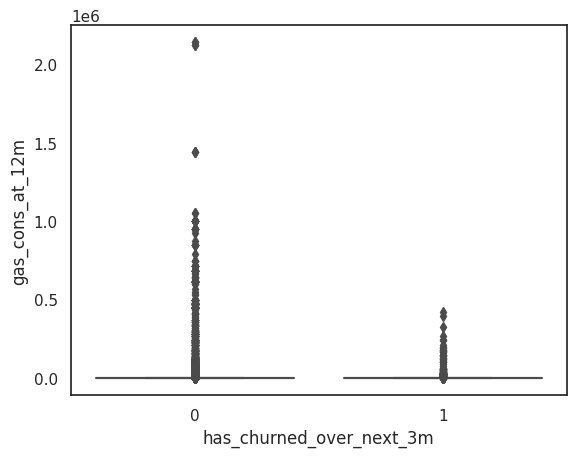

In [ ]:
#2
sns.boxplot(data=data, y=data['gas_cons_at_12m'], x='has_churned_over_next_3m')

Conlusions are same as above. 

In [ ]:
data.loc[data['gas_cons_at_12m']<0]

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
2001,f2375ff402484b6d7482a5358c152bd8,NaN,NaN,NaN,15172,-245,1127,2007-03-07,2017-01-17,NaN,2007-03-07,2016-01-18,NaN,NaN,NaN,NaN,0.000000,707.722136,0.0,0.000000,0.000000,0.000000,0.000000,t,0.000000,38.432342,34.751019,2,87.837659,9,ldkssxwpmemidmecebumciepifcamkci,20.656360,0
2180,291a6f4871cfbd7d178d8f6bc11ec329,NaN,NaN,NaN,6955,-876,0,2007-03-14,2017-01-17,2007-03-14,2007-03-14,2016-01-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.184510,0.000000,29.833811,t,0.000000,53.917218,48.752643,2,40.222592,9,lxidpiddsbxsbosboudacockeimpuepw,17.346335,0
2865,c1190f3d5f8d280d7fc70b3ba964d6e2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,28797,-1342,4057,2012-08-10,2016-08-10,NaN,2012-08-10,2015-08-11,NaN,NaN,NaN,NaN,1455.385264,4927.708428,0.0,90.026595,0.147417,0.051548,27.257522,f,377.217881,30.021380,27.145719,3,145.451395,3,lxidpiddsbxsbosboudacockeimpuepw,31.418949,0
7794,cd029bf22c3b562bf0d735e95b6426ed,kwuslieomapmswolewpobpplkaooaaew,NaN,foosdfpfkusacimwkcsosbicdxkicaua,14220,-879,621,2012-07-06,2016-07-06,NaN,2012-07-06,2015-07-08,NaN,NaN,NaN,NaN,647.800298,754.964178,0.0,66.081220,0.142310,0.049471,27.257522,t,54.200957,45.739462,41.358211,3,61.741035,4,lxidpiddsbxsbosboudacockeimpuepw,34.693921,0
11835,f8d5720407a5be0e16506b4a5e0589e1,cluecxlameloamldmasudocsbmaoamdw,NaN,foosdfpfkusacimwkcsosbicdxkicaua,87894,-315,3373,2013-06-01,2016-06-01,NaN,NaN,2015-06-09,NaN,NaN,NaN,NaN,4120.903327,4096.430181,0.0,90.869450,0.142894,0.049709,27.257522,f,297.783175,26.865326,24.291974,1,326.616568,3,ldkssxwpmemidmecebumciepifcamkci,21.684170,1
12563,9381c75416e2143ec498f81348c2c9c3,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,20132,-1552,1263,2012-08-31,2016-08-31,2012-08-31,2015-07-10,2015-09-01,232.705895,436.309735,4137.571853,260.760353,968.195628,1535.366380,0.0,99.774698,0.146698,0.051253,27.257522,t,118.362422,33.021964,29.858885,2,88.699785,3,lxidpiddsbxsbosboudacockeimpuepw,30.346070,0


Again, I will remove those rows as it does not make sense to have negative values for gas consumption. 

In [ ]:
data = data.loc[data['gas_cons_at_12m']>=0]

In [ ]:
#3
data['elect_cons_last_month'].value_counts().head(10)

0         5222
286317      28
569217      25
381479      24
351603      23
216936      19
417615      19
351088      19
79435       18
177369      18
Name: elect_cons_last_month, dtype: int64

In [ ]:
#3
px.histogram(data['elect_cons_last_month'], title=f'Histogram of elect_cons_last_month')

<Axes: xlabel='has_churned_over_next_3m', ylabel='elect_cons_last_month'>

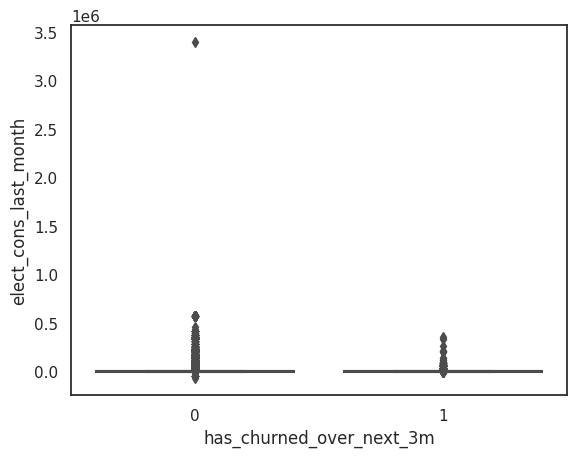

In [ ]:
#3
sns.boxplot(data=data, y=data['elect_cons_last_month'], x='has_churned_over_next_3m')

Conlusions are same as above. 

In [ ]:
data.loc[data['elect_cons_last_month']<0].head()

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
280,640be6b6b611728423cb32f8d324ff57,apdekpcbwosbxepsfxclislboipuxpop,NaN,NaN,4418159,65578,-46410,2007-04-20,2016-07-23,NaN,2015-06-17,2015-07-26,NaN,NaN,NaN,NaN,1547.036704,0.000000,0.000000,92.893684,0.123885,0.045632,39.720589,t,0.00000,0.000000,0.000000,2,41.525690,9,ldkssxwpmemidmecebumciepifcamkci,18.778509,0
426,7542cc4c0bfd349b2c815bd2e0c0f348,apdekpcbwosbxepsfxclislboipuxpop,NaN,NaN,4418159,65578,-46410,2007-04-24,2016-07-23,NaN,2015-06-17,2015-07-26,NaN,NaN,NaN,NaN,2697.352795,0.000000,0.000000,106.448452,0.139416,0.047994,27.339538,t,0.00000,0.000000,0.000000,2,56.716927,9,ldkssxwpmemidmecebumciepifcamkci,32.186364,0
1353,6cd3dcb13e4ab1e5238ccffe572927d6,NaN,NaN,NaN,4418159,65578,-46410,2009-09-07,2016-11-13,NaN,2013-11-14,2015-11-17,NaN,NaN,NaN,NaN,2056.584765,0.000000,0.000000,9.423396,0.204019,0.042031,29.833811,t,0.00000,0.000000,0.000000,2,54.829171,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,14.396857,0
1449,dc176f89fc4d29b1cec7bc32d4c42079,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,17108,0,-851,2013-02-20,2016-05-09,NaN,2014-05-09,2015-05-14,NaN,NaN,NaN,NaN,1028.894906,-1033.873929,12.368383,89.052476,0.186997,0.064138,27.592143,f,-96.43268,143.095177,129.388501,1,419.290055,3,lxidpiddsbxsbosboudacockeimpuepw,32.924986,1
1515,1f8495049424c1b62244c428b4fc954e,mxokpaemsfodeossocaxbsdsiwfbewux,NaN,foosdfpfkusacimwkcsosbicdxkicaua,30260,0,-3627,2012-03-12,2016-03-12,NaN,2013-10-31,2015-03-18,NaN,NaN,NaN,NaN,2176.523686,-4405.320459,0.000000,14.881228,0.181764,0.000000,29.744311,f,-498.78041,38.276871,34.610440,1,171.964218,4,lxidpiddsbxsbosboudacockeimpuepw,14.961464,0


Removing negative values

In [ ]:
data = data.loc[data['elect_cons_last_month']>=0]

In [ ]:
#4 
data['fcst_consumption_elect_12m'].value_counts().head(10)

0.000000      330
0.084862        6
234.865301      4
214.911312      3
684.936104      3
171.948285      3
0.169725        3
870.898007      3
623.405174      3
250.479991      3
Name: fcst_consumption_elect_12m, dtype: int64

In [ ]:
#4
px.histogram(data['fcst_consumption_elect_12m'], title=f'Histogram of fcst_consumption_elect_12m')

<Axes: xlabel='has_churned_over_next_3m', ylabel='fcst_consumption_elect_12m'>

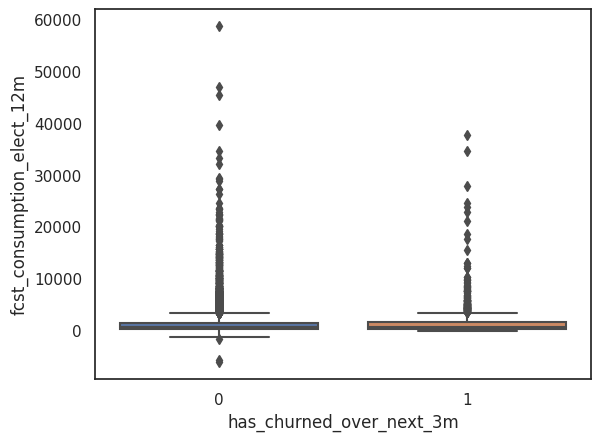

In [ ]:
#4
sns.boxplot(data=data, y=data['fcst_consumption_elect_12m'], x='has_churned_over_next_3m')

Conlusions same as above.

In [ ]:
data.loc[data['fcst_consumption_elect_12m']<0].head()

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
710,0c4fff73bf5529077588adee152cc39e,apdekpcbwosbxepsfxclislboipuxpop,NaN,lmkebamcaaclubfxadlmueccxoimlema,1119217,0,51180,2010-06-04,2016-06-04,NaN,2010-06-04,2015-06-23,NaN,NaN,NaN,NaN,-5697.392956,0.000000,0.0,0.753043,0.183733,0.000000,29.744311,f,0.0,29.974739,27.103545,1,86.286825,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,16.525088,0
1663,1aa5951da90eb21db41a69663e6b9f90,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,50113,0,2920,2013-02-01,2016-10-18,NaN,2013-11-08,2015-10-19,NaN,NaN,NaN,NaN,-124.911861,0.000000,0.0,9.492483,0.183733,0.000000,29.744311,f,0.0,29.850363,26.991082,1,0.654026,3,lxidpiddsbxsbosboudacockeimpuepw,13.009751,0
5166,ca2ac4600beafeec0742efbf7e006efc,apdekpcbwosbxepsfxclislboipuxpop,NaN,lmkebamcaaclubfxadlmueccxoimlema,180165,0,18955,2010-06-04,2016-06-04,NaN,2010-06-04,2015-06-08,NaN,NaN,NaN,NaN,-1560.246957,0.000000,0.0,1.181379,0.207598,0.044787,29.744311,f,0.0,23.444972,21.199246,1,48.546558,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,12.957171,0
5699,27276020e48d73f589788d4e37c51879,ibkiiwcxiccxpoedpweiuxwbxbuewbxm,NaN,foosdfpfkusacimwkcsosbicdxkicaua,456305,342629,26428,2012-12-17,2016-12-17,NaN,2015-11-01,2015-12-18,NaN,NaN,NaN,NaN,-34.063785,0.000000,0.0,8.483820,0.183813,0.000000,30.415567,t,0.0,25.714844,23.251693,2,100.635757,3,lxidpiddsbxsbosboudacockeimpuepw,18.778509,0
5805,5239eb6205a6318c14741c1622e4d66a,NaN,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,14711,0,1766,2013-06-07,2016-03-11,NaN,2014-03-11,2015-03-13,NaN,NaN,NaN,NaN,-300.101891,2144.970428,0.0,0.000000,0.000757,0.000000,0.000000,f,0.0,50.232564,45.420931,1,57.633555,3,ldkssxwpmemidmecebumciepifcamkci,20.656360,0


I remove negative values.

In [ ]:
# here we delete those rows
data = data.loc[data['fcst_consumption_elect_12m']>=0]

In [ ]:
#5
data['fcst_consumption_elect_cal_year'].value_counts().head(10)

0.000000      6450
7.268007        14
0.908501        13
381.570343      11
6.359506        11
411.550870      11
300.713770      10
391.563852      10
30.889028       10
281.635253       9
Name: fcst_consumption_elect_cal_year, dtype: int64

In [ ]:
#5
px.histogram(data['fcst_consumption_elect_cal_year'], title=f'Histogram of fcst_consumption_elect_cal_year')

<Axes: xlabel='has_churned_over_next_3m', ylabel='fcst_consumption_elect_cal_year'>

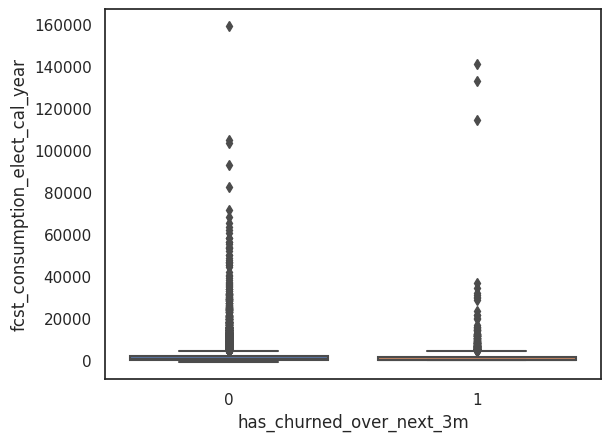

In [ ]:
#5
sns.boxplot(data=data, y=data['fcst_consumption_elect_cal_year'], x='has_churned_over_next_3m')

Conclusions same as above. We delete negative values in the next code cell. 

In [ ]:
# here we delete those rows
data = data.loc[data['fcst_consumption_elect_cal_year']>=0]

In [ ]:
#6
data['fcst_bill_meter_rent_12m'].value_counts().head(10)

0.000000      806
91.028349     272
12.656644     166
12.691187     135
89.542990     113
248.193187    105
11.040020     102
90.765820      83
89.536081      80
11.233462      78
Name: fcst_bill_meter_rent_12m, dtype: int64

In [ ]:
#6
px.histogram(data['fcst_bill_meter_rent_12m'], title=f'Histogram of fcst_bill_meter_rent_12m')

<Axes: xlabel='has_churned_over_next_3m', ylabel='fcst_bill_meter_rent_12m'>

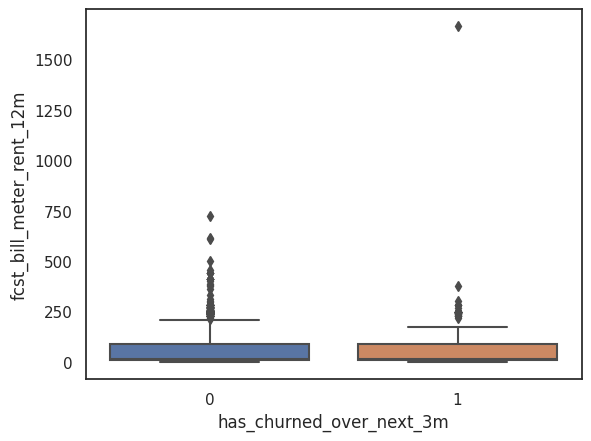

In [ ]:
#6
sns.boxplot(data=data, y=data['fcst_bill_meter_rent_12m'], x='has_churned_over_next_3m')

There seems to be a bimodal distribution for this variable and values seem to be more spread within the 1st and 3rd quartile. There might be a need to investigate this but for now I will continue the analysis. Next I will check negative values. 

In [ ]:
data.loc[data['fcst_bill_meter_rent_12m']<0]

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
8329,56c376b382c0a9f8b034eae409921ea0,kkpddsilciodwwwffucmkflilcpfaumo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,17329,842,0,2011-02-10,2016-02-10,NaN,2015-12-15,2015-02-11,NaN,NaN,NaN,NaN,1240.666307,0.0,0.0,-0.345432,0.18104,0.0,29.744311,t,0.0,52.611264,47.571783,2,102.39469,5,lxidpiddsbxsbosboudacockeimpuepw,18.778509,1


We remove negative values.

In [ ]:
data = data.loc[data['fcst_bill_meter_rent_12m']>=0]

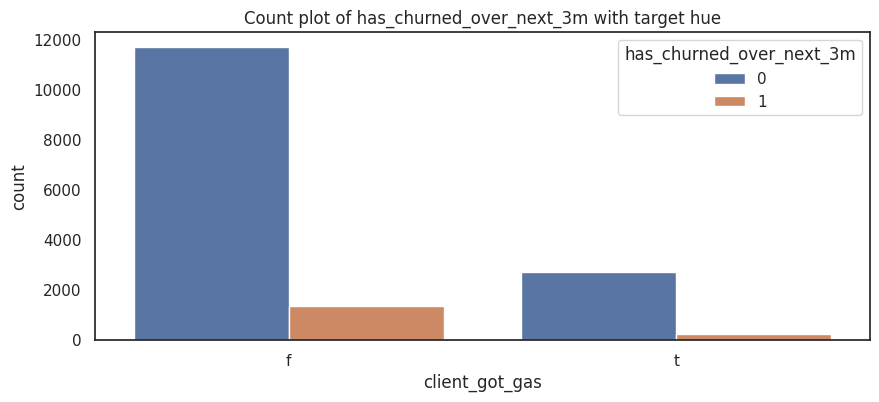

In [ ]:
#7
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='client_got_gas', hue='has_churned_over_next_3m')  # replace 'target' with your target column
plt.title(f'Count plot of {column} with target hue')
plt.show()

We can see that clients who do not have gas from EnergyInc tend to leave the company more than clients who do. It also seems like out of the clients who did not leave the company, more of them did not have gas than those who did. This last point is the same with clients who did leave the company. 

In [ ]:
#8
data['current_paid_consumption'].value_counts().head(10)

0.000000     6472
0.207799        5
0.069266        5
81.166366       4
48.264827       4
29.119594       4
87.691261       4
18.362522       4
23.917687       4
0.103900        4
Name: current_paid_consumption, dtype: int64

In [ ]:
#8
px.histogram(data['current_paid_consumption'], title=f'Histogram of current_paid_consumption')

<Axes: xlabel='has_churned_over_next_3m', ylabel='current_paid_consumption'>

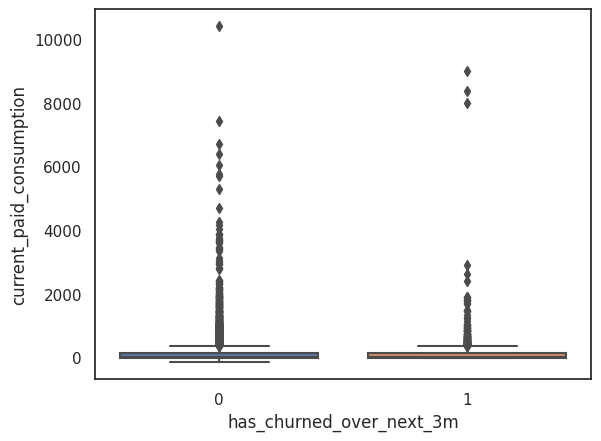

In [ ]:
#8
sns.boxplot(data=data, y=data['current_paid_consumption'], x='has_churned_over_next_3m')

Conclusions same as above. We will check negative values. 

In [ ]:
data.loc[data['current_paid_consumption']<0]

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
128,e6858b76c83d66ff00ca323d62531c64,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,0,0,0,2011-01-03,2017-01-03,NaN,2015-11-18,2016-01-04,NaN,NaN,NaN,NaN,496.015330,0.0,0.0,0.0,0.199214,0.041049,29.744311,f,-142.072310,40.29799,36.437961,1,52.802681,5,ldkssxwpmemidmecebumciepifcamkci,12.957171,0
408,7928d1b4430517a4e41f04ed4ad0f3fe,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,0,0,2009-09-16,2016-09-16,NaN,2015-07-12,2015-09-17,NaN,NaN,NaN,NaN,715.594076,0.0,0.0,0.0,0.203954,0.043305,29.744311,f,-85.821068,15.67144,14.170318,1,38.969043,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.009751,0


We delete negative values.

In [ ]:
data = data.loc[data['current_paid_consumption']>=0]

In [ ]:
#9
data['number_active_products'].value_counts().head(10)

1     12497
2      2682
3       553
4       168
5        37
32       25
9        12
6         9
8         8
31        4
Name: number_active_products, dtype: int64

In [ ]:
#9
px.histogram(data['number_active_products'], title=f'Histogram of number_active_products')

<Axes: xlabel='has_churned_over_next_3m', ylabel='number_active_products'>

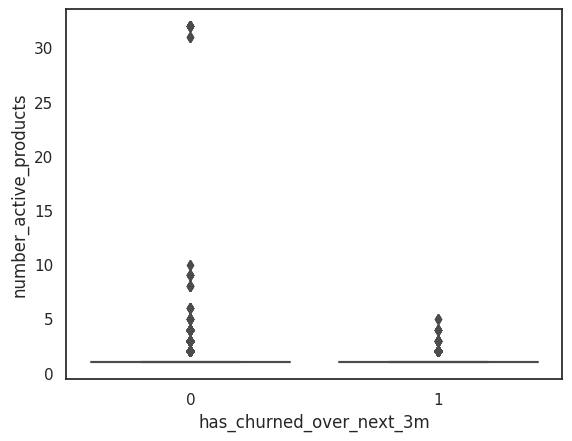

In [ ]:
#9
sns.boxplot(data=data, y=data['number_active_products'], x='has_churned_over_next_3m')

Same conclusions as above. We will check negative values. 

In [ ]:
data.loc[data['number_active_products']<0]

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m


There are none so we are good. 

In [ ]:
#10
data['customer_antiquity_in_years'].value_counts().head(15)

6     5017
4     4307
3     2740
5     2487
7      645
11     235
8      199
12     127
10     113
9      100
13      13
2       11
16       1
15       1
1        1
Name: customer_antiquity_in_years, dtype: int64

In [ ]:
#10
px.histogram(data['customer_antiquity_in_years'], title=f'Histogram of customer_antiquity_in_years')

<Axes: xlabel='has_churned_over_next_3m', ylabel='customer_antiquity_in_years'>

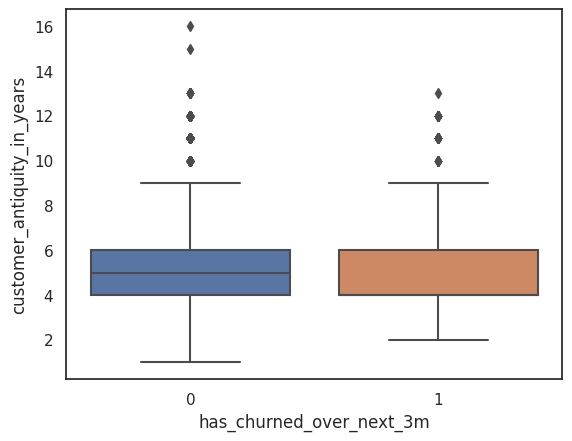

In [ ]:
#10
sns.boxplot(data=data, y=data['customer_antiquity_in_years'], x='has_churned_over_next_3m')

The distribution of the customer antiquity in years seems to be mostly centered around 3 to 7 years. I might need to do some transformation to the feature later on. For this variable it seems the data is less compressed within the 1st and 3rd quartile, with less outliers. Let's check for negative values.

In [ ]:
data.loc[data['customer_antiquity_in_years']<0]

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m


No negative values so we are good. 

**For now I will assume that negative values are not possible for bills and forecasted energy consumption and therefore keep the rows I removed outside of my final dataframe.**

### Drop columns Null values OR columns that are not going to be used.

In [ ]:
# dropping 'campaing_code_elect' because no values in the column
# dropping 'contract_activation_date' and others date related features as I am not going to use them. They also have a lot of null values.
# dropping the rest because of high number of null values (12588/16096 = 78.2% of total data)
data = data.drop(columns = ['campaing_code_elect', 'contract_fist_act_date',
                     'fcst_bill_baseline_elect_next_month', 'fcst_bill_baseline_elect_cal_year',
                    'fcst_bill_baseline_elect_12m','fcst_consumption_elect_next_month', 
                           'contract_end_date','contract_last_mod_date', 'contract_renewal_date','contract_activation_date' ])
# dropping the same columns in test_set
test_data  = test_data.drop(columns = ['campaing_code_elect', 'contract_fist_act_date',
                     'fcst_bill_baseline_elect_next_month', 'fcst_bill_baseline_elect_cal_year',
                    'fcst_bill_baseline_elect_12m','fcst_consumption_elect_next_month', 
                                      'contract_end_date','contract_last_mod_date', 'contract_renewal_date','contract_activation_date' ])

## Splitting train data into sub_train and validation set

In [ ]:
X_train = data.drop(columns= ['contract_id', 'has_churned_over_next_3m'])
y_train = data['has_churned_over_next_3m']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

## Handle features with null values

In [ ]:
# these are the columns with null values which we will handle now 
null_col

['company_category',
 'campaing_code_elect',
 'channel',
 'contract_end_date',
 'contract_fist_act_date',
 'contract_last_mod_date',
 'contract_renewal_date',
 'fcst_bill_baseline_elect_next_month',
 'fcst_bill_baseline_elect_cal_year',
 'fcst_bill_baseline_elect_12m',
 'fcst_consumption_elect_next_month',
 'fcst_current_discount',
 'fcst_price_period_1',
 'fcst_price_period_2',
 'fcst_price_power_period_1',
 'gross_margin_power_elect',
 'net_margin_power_elect',
 'total_net_margin',
 'code_elect_campaign_first_subs',
 'subscribed_power']

### Handle Null values (deleting rows OR imputing values)

In [ ]:
# this code changes the unknown value for company to a string indicating it is unknown
# I am not dropping these rows as having an unknown category might contain relevant information in the model
X_train['company_category'] = X_train['company_category'].fillna('cat_unknown')

#doing the same in test_data
X_val['company_category'] = X_val['company_category'].fillna('cat_unknown')

In [ ]:
# this code changes the unknown value for channels to a string indicating it is unknown
# I am not dropping these rows as having an unknown channel might contain relevant information in the model
X_train['channel'] = X_train['channel'].fillna('channel_unknown')

# doing the same in test data
X_val['channel'] = X_val['channel'].fillna('channel_unknown')

In [ ]:
# I will impute the forecasted current discount with the columns' median as we can see it is heavily skewed towards 
# the value 0. It wouldn't make much sense to impute them with the mean as it woulnd't represent the feature's
# distribution
px.histogram(X_train['fcst_current_discount'])

In [ ]:
# here we fill the NaN with the median
X_train['fcst_current_discount'] = X_train['fcst_current_discount'].fillna(X_train['fcst_current_discount'].median())

# we do the same using the value from train data
X_val['fcst_current_discount'] = X_val['fcst_current_discount'].fillna(X_train['fcst_current_discount'].median())

In [ ]:
px.histogram(X_train['fcst_price_period_1'])
# here we can see that the forecasted price for period 1 seems to have trimodal distirbution

In [ ]:
X_train['fcst_price_period_1'].mean()

0.1713540107595372

In [ ]:
X_train['fcst_price_period_1'].median()

0.1801647674464923

In [ ]:
X_train['fcst_price_period_1'].mode()

0    0.183733
Name: fcst_price_period_1, dtype: float64

The three metrics are very similar and eventhough this is a trimodal distribution and there might be some more analysis needed, I will impute the missing value with the mean. 

In [ ]:
X_train['fcst_price_period_1'] = X_train['fcst_price_period_1'].fillna(X_train['fcst_price_period_1'].mean())

# we do the same for the test data using the train data mena
X_val['fcst_price_period_1'] = X_val['fcst_price_period_1'].fillna(X_train['fcst_price_period_1'].mean())

For now, I will not investigate the trimodality of this variable. I will just scale it later like the rest of them. 

In [ ]:
px.histogram(X_train['fcst_price_period_2'])
# here we cann see that a lot of values are 0 but the rest seems to be centered around 0.05

In [ ]:
X_train['fcst_price_period_2'].mean()

0.02716230505403312

In [ ]:
X_train['fcst_price_period_2'].median()

0.0441623037968959

In [ ]:
X_train['fcst_price_period_2'].mode()

0    0.0
Name: fcst_price_period_2, dtype: float64

I will use the mean to impute the missing values since the feature's values are discrete and, eventhough there a lot of 0's, it seems like the mean is between the mode and median which is, according to me a good imputation metric to use in this case. 

In [ ]:
X_train['fcst_price_period_2'] = X_train['fcst_price_period_2'].fillna(X_train['fcst_price_period_2'].mean())

# we do the same for the test data using the value from train data
X_val['fcst_price_period_2'] = X_val['fcst_price_period_2'].fillna(X_train['fcst_price_period_2'].mean())

In [ ]:
X_train.loc[X_train['fcst_price_period_2'].isna()].head()

,company_category,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power


For now, I will not investigate the particular dsitribution of this variable. I will just scale it later like the rest of them.

In [ ]:
px.histogram(X_train['fcst_price_power_period_1'])

In [ ]:
X_train['fcst_price_power_period_1'].median()

29.744310877528388

In [ ]:
X_train['fcst_price_power_period_1'].mean()

29.22308092986228

It seems the data is weirdly distributed but the mean and median are very similar. I will therefore impute the ,null values with the mean. 

In [ ]:
X_train['fcst_price_power_period_1'] = X_train['fcst_price_power_period_1'].fillna(X_train['fcst_price_power_period_1'].mean())

# we do the same for the test data using the train set value
X_val['fcst_price_power_period_1'] = X_val['fcst_price_power_period_1'].fillna(X_train['fcst_price_power_period_1'].mean())

In [ ]:
px.histogram(X_train['gross_margin_power_elect'])

This variable seems to be more or less normally distributed. Let's check the different measures of central tendency. 

In [ ]:
X_train['gross_margin_power_elect'].mean()

35.22636762322217

In [ ]:
X_train['gross_margin_power_elect'].median()

32.78875786029258

In [ ]:
X_train['gross_margin_power_elect'].mode()

0    40.484555
1    51.491876
Name: gross_margin_power_elect, dtype: float64

In this case I will take the mean to impute the missing values. 

In [ ]:
X_train['gross_margin_power_elect'] = X_train['gross_margin_power_elect'].fillna(X_train['gross_margin_power_elect'].mean())

# we do the same to the test_data but using the train_data value
X_val['gross_margin_power_elect'] = X_val['gross_margin_power_elect'].fillna(X_train['gross_margin_power_elect'].mean())

In [ ]:
px.histogram(X_train['net_margin_power_elect'])

This variable seems to be more or less normally distributed. Let's check the different measures of central tendency.

In [ ]:
X_train['net_margin_power_elect'].mean()

30.34696452258974

In [ ]:
X_train['net_margin_power_elect'].median()

29.648017095976144

In [ ]:
X_train['net_margin_power_elect'].mode()

0    36.606656
1    46.559617
Name: net_margin_power_elect, dtype: float64

In this case I will take the mean again. 

In [ ]:
X_train['net_margin_power_elect'] = X_train['net_margin_power_elect'].fillna(X_train['net_margin_power_elect'].mean())

# we do the same to the test_data set using the value from the train_data
X_val['net_margin_power_elect'] = X_val['net_margin_power_elect'].fillna(X_train['net_margin_power_elect'].mean())

In [ ]:
px.histogram(X_train['total_net_margin'])

This variable seems to be left-skewed towards zero. For now we will accept the fact that the company has negative values for it's total net margin. Let's check the different measures of central tendency.

In [ ]:
X_train['total_net_margin'].mean()

107.83306049995578

In [ ]:
X_train['total_net_margin'].median()

59.516356378529245

Here I will choose the median to impute missing values as the mean is heavily influenced by the skewness of the data.

In [ ]:
X_train['total_net_margin'] = X_train['total_net_margin'].fillna(X_train['total_net_margin'].median())

# we do the same for the test_data using the train_data value
X_val['total_net_margin'] = X_val['total_net_margin'].fillna(X_train['total_net_margin'].median())

**For the 3 previous margin features, for now I will make the assumption that negative values are possible as it is possible EnergyInc. still provides electricity and gas to strategic customers even if they get a negative margin out of it.**

In [ ]:
X_train['code_elect_campaign_first_subs'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', nan,
       'ewxeelcelemmiwuafmddpobolfuxioce',
       'usapbepcfoloekilkwsdiboslwaxobdp'], dtype=object)

In [ ]:
# we are going to replace the null values with a string indicating the value is unknown as this data might still 
# have value
X_train['code_elect_campaign_first_subs'] = X_train['code_elect_campaign_first_subs'].fillna('cat_unknown')

#doing the same in test_data
X_val['code_elect_campaign_first_subs'] = X_val['code_elect_campaign_first_subs'].fillna('cat_unknown')

In [ ]:
px.histogram(X_train['subscribed_power'])

Data is left-skewed and does not contain any negative values. In this case I will use the median as an imputation metric given that the mean is greatly influenced by the strong skewness towards zero. 

In [ ]:
X_train['subscribed_power'] = X_train['subscribed_power'].fillna(X_train['subscribed_power'].median())

# we do the same to the tes_data using the value from train-data
X_val['subscribed_power'] = X_val['subscribed_power'].fillna(X_train['subscribed_power'].median())

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11997 entries, 1405 to 7324
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   company_category                 11997 non-null  object 
 1   channel                          11997 non-null  object 
 2   elect_cons_at_12m                11997 non-null  int64  
 3   gas_cons_at_12m                  11997 non-null  int64  
 4   elect_cons_last_month            11997 non-null  int64  
 5   fcst_consumption_elect_12m       11997 non-null  float64
 6   fcst_consumption_elect_cal_year  11997 non-null  float64
 7   fcst_current_discount            11997 non-null  float64
 8   fcst_bill_meter_rent_12m         11997 non-null  float64
 9   fcst_price_period_1              11997 non-null  float64
 10  fcst_price_period_2              11997 non-null  float64
 11  fcst_price_power_period_1        11997 non-null  float64
 12  client_got_gas  

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 16085 to 5691
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   company_category                 4000 non-null   object 
 1   channel                          4000 non-null   object 
 2   elect_cons_at_12m                4000 non-null   int64  
 3   gas_cons_at_12m                  4000 non-null   int64  
 4   elect_cons_last_month            4000 non-null   int64  
 5   fcst_consumption_elect_12m       4000 non-null   float64
 6   fcst_consumption_elect_cal_year  4000 non-null   float64
 7   fcst_current_discount            4000 non-null   float64
 8   fcst_bill_meter_rent_12m         4000 non-null   float64
 9   fcst_price_period_1              4000 non-null   float64
 10  fcst_price_period_2              4000 non-null   float64
 11  fcst_price_power_period_1        4000 non-null   float64
 12  client_got_gas  

**At this stage we have been through every variable, analyzed its distribution, handled values that do not make sense and have imputed null values using metric of central tendency depending on the data's distribution. From now on I will perform feature engineering from the historical price dataset and add the results to the main datasets.** 

## Feature Engineering with history data

In [ ]:
#train_hist.info()

In [ ]:
#test_hist.info()

In [ ]:
#train_hist.head()

In [ ]:
#test_hist.head()

In [ ]:
# train_hist = train_hist.sort_values(by = ['contract_id', 'reference_date'])
# test_hist = test_hist.sort_values(by = ['contract_id', 'reference_date'])

In [ ]:
# for feature in features:
#     print(f'mean: {train_hist[feature].mean()}, median: {train_hist[feature].median()}, mode: {train_hist[feature].mode()}')
#     fig = px.histogram(train_hist, x=feature)
#     fig.show()

As seen in the distributions above, it seems like using the mean for the features 'price_power_1st_period' and 'price_energy_1st_period' would be a good idea as the distributions do not seem skewed and all of the metrics are close to each other. For the rest, they are "left-skewed" with more than half the data being 0, in this case it would make more sense to impute NaN values with the mode since it represents the most common value. 

In [ ]:
# # defining features
# mean_features = ['price_energy_1st_period','price_power_1st_period']

# mode_features = ['price_energy_2nd_period', 'price_energy_3rd_period',
#                  'price_power_2nd_period', 'price_power_3rd_period']

# # Compute and store the overall means from the training data
# mean_values = train_hist[mean_features].mean()
# mode_values = train_hist[mode_features].mode()

# # Fill missing values in the training data with the corresponding mean
# for feature in mean_features:
#     train_hist[feature] = train_hist[feature].fillna(mean_values[feature])
    
# for feature in mode_features:
#     train_hist[feature] = train_hist[feature].fillna(float(mode_values[feature]))

# # Use the stored mean values to fill missing values in the test data
# for feature in mean_features:
#     test_hist[feature] = test_hist[feature].fillna(mean_values[feature])
    
# for feature in mode_features:
#     test_hist[feature] = test_hist[feature].fillna(float(mode_values[feature]))

In [ ]:
# # let's check this worked
# print(train_hist.isnull().sum())

In [ ]:
# # let's check this worked
# print(test_hist.isnull().sum())

Before performing feature engineering on train data and doing the same on the test data, I need to check that the test data does not have any similar contract_id's to the train data in order to avoid data leakage. 

In [ ]:
# common_values = data['contract_id'].isin(test_data['contract_id']).any()

In [ ]:
# print(common_values)

There are no similar contract_id's. Now we can start with the feature engineering part. 

In [ ]:
# # 1. Statistical features

# # Store the initial dataframes to prevent unwanted overwriting
# data_original = data.copy()
# test_data_original = test_data.copy()

# # feature engineering on train data
# train_features = []
# for period in features:
#     stats_df = train_hist.groupby('contract_id')[period].agg(['mean', 'median', 'max', 'min', 'std']).reset_index()
#     stats_df.columns = ['contract_id'] + [f'{period}_{stat}' for stat in ['mean', 'median', 'max', 'min', 'std']]
#     train_features.append(stats_df)

# # Merge all feature dataframes together
# for feature_df in train_features:
#     data = data.merge(feature_df, on='contract_id', how='left')

# train_data = data

# # feature engineering on test data
# test_features = []
# for period in features:
#     stats_df = test_hist.groupby('contract_id')[period].agg(['mean', 'median', 'max', 'min', 'std']).reset_index()
#     stats_df.columns = ['contract_id'] + [f'{period}_{stat}' for stat in ['mean', 'median', 'max', 'min', 'std']]
#     test_features.append(stats_df)

# # Merge all feature dataframes together
# for feature_df in test_features:
#     test_data = test_data.merge(feature_df, on='contract_id', how='left')

In [ ]:
# # 2. Average change of prices over time

# # feature engineering on train data
# for period in features:
#     train_hist[f'{period}_diff'] = train_hist.groupby('contract_id')[period].diff()
#     train_hist[f'{period}_pct_change'] = train_hist.groupby('contract_id')[period].pct_change()
#     avg_diff_df = train_hist.groupby('contract_id')[f'{period}_diff'].mean().reset_index()
#     avg_pct_change_df = train_hist.groupby('contract_id')[f'{period}_pct_change'].mean().reset_index()
#     train_data = train_data.merge(avg_diff_df, on='contract_id', how='left')
#     train_data = train_data.merge(avg_pct_change_df, on='contract_id', how='left')

# # feature engineering on test data    
# for period in features:
#     test_hist[f'{period}_diff'] = test_hist.groupby('contract_id')[period].diff()
#     test_hist[f'{period}_pct_change'] = test_hist.groupby('contract_id')[period].pct_change()
#     avg_diff_df = test_hist.groupby('contract_id')[f'{period}_diff'].mean().reset_index()
#     avg_pct_change_df = test_hist.groupby('contract_id')[f'{period}_pct_change'].mean().reset_index()
#     test_data = test_data.merge(avg_diff_df, on='contract_id', how='left')
#     test_data = test_data.merge(avg_pct_change_df, on='contract_id', how='left')

After this operation, there are some infinite values given that, as we are calculating the percent change, when the previous value (the denominator of the percent change calculation) is zero, the result becomes infinite. We will therefore set those values to 0 for simplicity for this exercice. 

In [ ]:
# # Select only numeric columns
# numeric_columns = train_data.select_dtypes(include=[np.number])

# # Create a boolean mask for infinite values
# infinite_mask = np.isinf(numeric_columns)

# # Find the rows in the original dataframe where there are infinite values in the numeric columns
# train_data[infinite_mask.any(axis=1)]

In [ ]:
# # train_data
# # Replace inf values with NaN
# train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# # filling the NaN's with zeros
# train_data.fillna(0, inplace=True)  # replace with zero

# # test_data
# # Replace inf values with NaN
# test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# # filling the NaN's with zeros
# test_data.fillna(0, inplace=True)  # replace with zero

In [ ]:
# train_data = train_data.fillna(0)

In [ ]:
# test_data = test_data.fillna(0)

## Scaling and One-Hot encoding the data

At first, I wanted to train a logistic regression because it is the most basic classification algorithm there is in order to get the most basic baseline. Secondly, I also decided to do a PCA because I have a lot of features and I wanted to see if I could get results but with less features capturing almost all of the variance in the original data. Nevertheless, after going through the data and checking the distribution of features, I realized most of them are skewed and some are also bimodal and trimodal. Knowing that for logistic regressoin and for PCA I would have to make those features normal, I would have to go through some specific transformers and methods to normalize all those different distributions. Instead, and given how data distribution is complex and spread-out, I will use tree-based models such as a RandomForestClassifier and a XGBoostClassifier as they do not assume any distribution. Moreover, instead of using PCA for dimensionality reduction, I will use feature importances in the tree-based models to perform some kind of dimensionality reduction. 

We use One-Hot Encoder for categorical features in our dataset. One-hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot, we transform each categorical feature with n categories into n binary features, with only one active.

Machine learning algorithms cannot work with categorical data directly, and categorical data are a common part of many data sets. By using One-Hot Encoder, we convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

Then we use a StandardScaler to scale our numerical features as it is usually good practice, even for tree-based algorithms. Standard Scaler standardizes features by removing the mean and scaling to unit variance. This process involves subtracting the mean of each feature and then dividing by its standard deviation.

In [ ]:
# setting numerical columns
data_num = X_train.select_dtypes(include='number')

# setting categorical columns
data_cat = X_train.select_dtypes(include="object")

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), data_num.columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), data_cat.columns)])

# Fit the preprocessor object on train data (PowerTransformer and StandardScaler will be fitted here)
X_train_preprocessed = preprocessor.fit_transform(X_train)

# transform test data
X_val_preprocessed = preprocessor.transform(X_val)

In [ ]:
print(X_train_preprocessed.shape)

(11997, 422)


In [ ]:
print(X_val_preprocessed.shape)

(4000, 422)


In [ ]:
# Get the list of categories generated by the one-hot-encoder
ohe_categories = preprocessor.named_transformers_['cat'].get_feature_names_out(data_cat.columns)

# Combine the numerical columns with the one-hot-encoded columns
new_columns = list(data_num.columns) + list(ohe_categories)

# Create new DataFrames with the new column names
X_train_preproc = pd.DataFrame(X_train_preprocessed.todense(), columns=new_columns)
X_val_preproc = pd.DataFrame(X_val_preprocessed.todense(), columns=new_columns)

## Modelling

### Scoring Metrics

To evaluate my models, I will use the ROC AUC score and the Brier score. 

The ROC AUC score focuses on the model's ability to correctly rank-order predictions. It's a good measure of how well the model can distinguish between classes, irrespective of the exact probability estimates. It basically tells if the model generally distinguishes positives from negatives. 

The Brier score, measures the accuracy of the actual predicted probabilities. It's more concerned with how close the predicted probabilities are to the actual outcomes. So it provides a finer level of detail: not just whether the model can tell positives from negatives, but how well-calibrated or precise the model's probability estimates are. The Brier score measures the mean squared difference between the predicted probability assigned to the possible outcomes for an item and the actual outcome. 

Therefore, when using both scoring metrics in the gridsearches of my models, I will use the Brier score to determine the best hyperparameters. The reason for that is because later I will build a cost-benefit analysis using the predicted probabilities for each item and I want these probabilities to be as accurate as possible.

### RandomOverSampling

In [157]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform the random oversampling
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_preproc, y_train)

### Baseline Model

Here we create a baseline model. This model with the strategy "most frequent" always predicts the most frequent class in the training data which, given that our target variable is imbalanced, establishes a "worst-case" scenario for model prediction. 

In [159]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_oversampled, y_train_oversampled)

dummy_predictions_proba = dummy.predict_proba(X_val_preproc)[:, 1]  # We need the probabilities to calculate the scores

# ROC AUC score
roc_auc = roc_auc_score(y_val, dummy_predictions_proba)
print(f'ROC AUC Score for DummyClassifier: {roc_auc}')

# Brier score loss
brier_score = brier_score_loss(y_val, dummy_predictions_proba)
print(f'Brier Score for DummyClassifier: {brier_score}')

ROC AUC Score for DummyClassifier: 0.5
Brier Score for DummyClassifier: 0.1035


### RandomForestClassifier

In [160]:
# create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# specify the hyperparameter grid to search over
param_grid_rfc = {
    'n_estimators': [50, 100, 200], # number of decision trees in the random forest
    'max_depth': [4, 5, 10], # maximum depth of the decision trees
    'min_samples_split': [4, 6, 8], # minimum number of samples required to split an internal node in the decision trees 
    'min_samples_leaf': [1, 2, 4],# minimum number of samples required to be at a leaf node in the decision trees
    'max_features' : [20, 40, 60] # maximum number of features to consider when looking for the best split in the decision trees
}

scoring = {"AUC": "roc_auc", "Brier": 'neg_brier_score'}

gd = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring = scoring, refit='Brier', n_jobs= -1, return_train_score=True)
gd.fit(X_train_oversampled, y_train_oversampled)

print("Best hyperparameters: ", gd.best_params_)
print("Best neg_brier_score: ", gd.best_score_)
print("Mean Train Brier: ", gd.cv_results_['mean_train_Brier'].mean())
print("Mean Test Brier: ", gd.cv_results_['mean_test_Brier'].mean())
print("Mean Train AUC: ", gd.cv_results_['mean_train_AUC'].mean())
print("Mean Test AUC: ", gd.cv_results_['mean_test_AUC'].mean())

Best hyperparameters:  {'max_depth': 10, 'max_features': 60, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Best neg_brier_score:  -0.16385442371425946
Mean Train Brier:  -0.2098289746330935
Mean Test Brier:  -0.2130761639451213
Mean Train AUC:  0.7627108098464925
Mean Test AUC:  0.7498495124239083


The mean train and test scores are the average Brier scores over all folds of cross-validation, for the training and validation sets respectively. It's useful to look at these numbers to assess if the model might be overfitting. If the training score is much better (lower in magnitude since we're dealing with negative numbers) than the validation score, it could suggest that the model is overfitting to the training data. However, in this case, the training and test scores are quite close, suggesting that the model is generalizing well.

Moreover, we beat the ROC AUC score and the Brier score compared to the baseline model. 

### XGBclassifier

In [ ]:
# xgb_model = xgb.XGBClassifier(random_state=42)

# param_grid = {
#     "colsample_bytree": [0.5,0.6, 0.7], # fraction of columns to be randomly subsampled for each tree, 
#     # This can help prevent overfitting by introducing some randomness in the tree-building process.
#     "gamma": [0.4,0.5,0.6], # minimum loss reduction required to make a split, higher value makes 
#     # the algorithm more conservative and can help prevent overfitting
#     "learning_rate": [0.05,0.1,0.2], # the step size shrinkage used in each boosting step
#     # smaller learning rate can result in better generalization but requires more boosting steps
#     "max_depth": [15,20,25], # maximum depth of a tree
#     "n_estimators": [50, 100] # number of trees to fit
# }

# scoring = {"AUC": "roc_auc", "Brier": 'neg_brier_score'}

# search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring = scoring, refit='Brier', n_jobs= -1, return_train_score=True)
# search_xgb.fit(X_train_preproc, y_train)
    
# # print the best hyperparameters found and the corresponding auc score
# print("Best hyperparameters: ", search_xgb.best_params_)
# print("Best 'neg_brier_score': ", search_xgb.best_score_)
# print("Mean Train Brier: ", search_xgb.cv_results_['mean_train_Brier'].mean())
# print("Mean Test Brier: ", search_xgb.cv_results_['mean_test_Brier'].mean())
# print("Mean Train AUC: ", search_xgb.cv_results_['mean_train_AUC'].mean())
# print("Mean Test AUC: ", search_xgb.cv_results_['mean_test_AUC'].mean())

### Performance on Validation set using final model

It is important to check how the final model performs on completely unseen data. Here we will check its Brier and ROC AUC score as well as checking the ROC curve on unseen data. 

In [161]:
# Predict probabilities on the validation set
y_pred_probs = gd.predict_proba(X_val_preproc)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_probs)
print(f'ROC AUC Score: {roc_auc}')

# Compute Brier score
brier = brier_score_loss(y_val, y_pred_probs)
print(f'Negative Brier Score: {-brier}')

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

# Plot ROC curve with plotly
trace0 = go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC curve')

trace1 = go.Scatter(x=[0, 1], y=[0, 1], 
                    mode='lines', 
                    name='Random Classifier',
                    line=dict(dash='dash'))

layout = go.Layout(title=f'ROC AUC = {roc_auc:.3f}',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'),
                   autosize=False,
                   width=500,
                   height=500)

fig = go.Figure(data=[trace0, trace1], layout=layout)

fig.show()

ROC AUC Score: 0.671073228955331
Negative Brier Score: -0.18528007740459435


In [166]:
predictions = gd.predict(X_val_preproc)

In [169]:
from collections import Counter
print(Counter(predictions).keys()) # equals to list(set(words))
print(Counter(predictions).values())

dict_keys([1, 0])
dict_values([1101, 2899])


Here we can see that the Brier score is close to the mean one we had in the cross-validation for the RandomForestClassifier. The AUC score has dropped a bit but for the brier score to be better. For now we accept this trade-off. 

### Refit preprocessing steps on the whole train set

In [170]:
X_train = data.drop(columns= ['contract_id', 'has_churned_over_next_3m'])
y_train = data['has_churned_over_next_3m']
X_test = test_data.drop(columns= ['contract_id'])

In [171]:
# this code changes the unknown value for company to a string indicating it is unknown
# I am not dropping these rows as having an unknown category might contain relevant information in the model
X_train['company_category'] = X_train['company_category'].fillna('cat_unknown')
#doing the same in test_data
X_test['company_category'] = X_test['company_category'].fillna('cat_unknown')


# this code changes the unknown value for channels to a string indicating it is unknown
# I am not dropping these rows as having an unknown channel might contain relevant information in the model
X_train['channel'] = X_train['channel'].fillna('channel_unknown')
# doing the same in test data
X_test['channel'] = X_test['channel'].fillna('channel_unknown')

# here we fill the NaN with the median
X_train['fcst_current_discount'] = X_train['fcst_current_discount'].fillna(X_train['fcst_current_discount'].median())
# we do the same using the value from train data
X_test['fcst_current_discount'] = X_test['fcst_current_discount'].fillna(X_train['fcst_current_discount'].median())

#
X_train['fcst_price_period_1'] = X_train['fcst_price_period_1'].fillna(X_train['fcst_price_period_1'].mean())
# we do the same for the test data using the train data mena
X_test['fcst_price_period_1'] = X_test['fcst_price_period_1'].fillna(X_train['fcst_price_period_1'].mean())


X_train['fcst_price_period_2'] = X_train['fcst_price_period_2'].fillna(X_train['fcst_price_period_2'].mean())
# we do the same for the test data using the value from train data
X_test['fcst_price_period_2'] = X_test['fcst_price_period_2'].fillna(X_train['fcst_price_period_2'].mean())


X_train['fcst_price_power_period_1'] = X_train['fcst_price_power_period_1'].fillna(X_train['fcst_price_power_period_1'].mean())
# we do the same for the test data using the train set value
X_test['fcst_price_power_period_1'] = X_test['fcst_price_power_period_1'].fillna(X_train['fcst_price_power_period_1'].mean())


X_train['gross_margin_power_elect'] = X_train['gross_margin_power_elect'].fillna(X_train['gross_margin_power_elect'].mean())
# we do the same to the test_data but using the train_data value
X_test['gross_margin_power_elect'] = X_test['gross_margin_power_elect'].fillna(X_train['gross_margin_power_elect'].mean())


X_train['net_margin_power_elect'] = X_train['net_margin_power_elect'].fillna(X_train['net_margin_power_elect'].mean())
# we do the same to the test_data set using the value from the train_data
X_test['net_margin_power_elect'] = X_test['net_margin_power_elect'].fillna(X_train['net_margin_power_elect'].mean())


X_train['total_net_margin'] = X_train['total_net_margin'].fillna(X_train['total_net_margin'].median())
# we do the same for the test_data using the train_data value
X_test['total_net_margin'] = X_test['total_net_margin'].fillna(X_train['total_net_margin'].median())


# we are going to replace the null values with a string indicating the value is unknown as this data might still 
# have value
X_train['code_elect_campaign_first_subs'] = X_train['code_elect_campaign_first_subs'].fillna('cat_unknown')
#doing the same in test_data
X_test['code_elect_campaign_first_subs'] = X_test['code_elect_campaign_first_subs'].fillna('cat_unknown')


X_train['subscribed_power'] = X_train['subscribed_power'].fillna(X_train['subscribed_power'].median())
# we do the same to the tes_data using the value from train-data
X_test['subscribed_power'] = X_test['subscribed_power'].fillna(X_train['subscribed_power'].median())

In [172]:
# setting numerical columns
data_num = X_train.select_dtypes(include='number')

# setting categorical columns
data_cat = X_train.select_dtypes(include="object")

In [173]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), data_num.columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), data_cat.columns)])

# Fit the preprocessor object on train data (PowerTransformer and StandardScaler will be fitted here)
X_train_preprocessed = preprocessor.fit_transform(X_train)

# transform test data
X_test_preprocessed = preprocessor.transform(X_test)

In [174]:
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)

(15997, 453)
(4024, 453)


In [175]:
# Get the list of categories generated by the one-hot-encoder
ohe_categories = preprocessor.named_transformers_['cat'].get_feature_names_out(data_cat.columns)

# Combine the numerical columns with the one-hot-encoded columns
new_columns = list(data_num.columns) + list(ohe_categories)

# Create new DataFrames with the new column names
X_train_preproc = pd.DataFrame(X_train_preprocessed.todense(), columns=new_columns)
X_test_preproc = pd.DataFrame(X_test_preprocessed.todense(), columns=new_columns)

In [176]:
X_train_preproc.shape

(15997, 453)

In [177]:
X_test_preproc.shape

(4024, 453)

### Oversampling technique

In [178]:
# Create an instance of the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform the random oversampling
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_preproc, y_train)

### Modelling the best model (RandomForestClassifier)

In [182]:
# create a random forest classifier
# using hyperparameters that were identified as best when fitting the GridSearchCV
rfc = RandomForestClassifier(random_state=42, max_depth=10, max_features= 60, min_samples_leaf= 1, min_samples_split= 4, n_estimators= 200)
rfc.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(max_depth=10, max_features=60, min_samples_split=4,
                       n_estimators=200, random_state=42)

**Checking feature importances**

### Make predictions

In [187]:
#submission_df[submission_df['does_churn']==1]

In [203]:
# Get the binary predictions
binary_predictions = rfc.predict(X_test_preproc)

# Get the probability of churn
probability_predictions = rfc.predict_proba(X_test_preproc)[:, 1]

# Create a dataframe with contract_id, does_churn and prob_of_churn
submission_df = pd.DataFrame({
    'contract_id': test_data['contract_id'],
    'does_churn': binary_predictions,
    'prob_of_churn': probability_predictions
})

# Ensure the order of columns
submission_df = submission_df[['contract_id', 'does_churn', 'prob_of_churn']]

# Sort the dataframe by 'prob_of_churn' in descending order
submission_df = submission_df.sort_values(by='prob_of_churn', ascending=False)

In [184]:
# Fetch the feature importances from the classifier
importances = rfc.feature_importances_

# Create a list of all feature names, starting with numerical then followed by the one-hot encoded names
feature_names = list(data_num.columns) + preprocessor.named_transformers_['cat'].get_feature_names_out(data_cat.columns).tolist()

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create a pandas dataframe
importances_df = pd.DataFrame({'Feature': names, 'Importance': importances[indices]})

importances_df.head(20)

,Feature,Importance
0,gross_margin_power_elect,0.117270
1,net_margin_power_elect,0.116715
2,elect_cons_at_12m,0.076731
3,elect_cons_last_month,0.065241
4,fcst_bill_meter_rent_12m,0.051599
5,total_net_margin,0.047891
6,fcst_consumption_elect_12m,0.046863
7,fcst_price_period_1,0.045666
8,customer_antiquity_in_years,0.045353
9,code_elect_campaign_first_subs_lxidpiddsbxsbos...,0.040963


Electricity Consumption: Features related to electricity consumption appear to be important factors in the model. These include elect_cons_at_12m, indicating the electricity consumption over the past 12 months, and elect_cons_last_month, representing the electricity consumption in the last month. The model recognizes the significance of customers' electricity usage patterns in predicting churn.

Profitability: Features such as gross_margin_power_elect and net_margin_power_elect rank high in importance. These metrics reflect the gross and net profit, respectively, from power subscription. The model places a strong emphasis on understanding the financial aspect of the business and its impact on customer churn.

Forecasted Metrics: The model considers forecasted metrics such as fcst_bill_meter_rent_12m, which predicts the bill for meter rental over the next 12 months, and fcst_consumption_elect_12m, which forecasts electricity consumption for the same period. These metrics help anticipate future customer behavior and potential churn.

Customer Information: Features like customer_antiquity_in_years, representing the number of years the customer has been with the company, and subscribed_power, indicating the level of subscribed power, are important factors in understanding customer loyalty and preferences.

Campaign Codes: The presence of features such as code_elect_campaign_first_subs_lxidpiddsbxsbos... and code_elect_campaign_first_subs_kamkkxfxxuwbdsl... suggests that the specific electricity campaigns customers have subscribed to play a role in predicting churn. The model recognizes the impact of campaign strategies on customer retention.

Total Net Margin: The feature total_net_margin represents the overall net profit, considering various factors. This suggests that the overall profitability of customer accounts is a key factor in determining churn.

By analyzing these high-ranking features, we can observe that the model places significant importance on factors related to electricity consumption, profitability, forecasted metrics, customer information, campaign codes, and overall net margin. Understanding and managing these aspects can help the company identify and address potential churn risks effectively.

In [204]:
submission_df

,contract_id,does_churn,prob_of_churn
1309,d223742947916ed54437e147b9a4c27d,1,0.702356
718,e9f2d95733a29e5314a333f13746c847,1,0.687125
2009,fb9f10cc3ce500bd93c575af118f4148,1,0.686722
48,d2e5c1c1cbebd89c0fe3e95d3806edc1,1,0.682332
17,5cb2c59448c6a30cbc60b83988805ceb,1,0.681015
...,...,...,...
3775,2408a9d019b8b72a6aa03562693d8183,0,0.029083
3527,c1094c552b37f44ce0aaa3ef366bbd8d,0,0.028115
1785,56b6c92ed52a5d2cd29fef2bb206581f,0,0.026913
1870,93b68dcc6cabe535037df10bf496b7fd,0,0.026117


In [193]:
submission_df['does_churn'].value_counts()

0    3282
1     742
Name: does_churn, dtype: int64

## Cost-Benefit Analysis

In this cost-benefit analysis, the objective is to assess the financial implications of offering a 20% discount to customers predicted to churn. The strategy begins by identifying the expected loss if a customer churns, which is calculated by multiplying the predicted churn probability by the different margin features per customer. This represents the potential revenue loss for each customer if no action is taken and they decide to churn.

The next step is to calculate the expected revenue from each customer if they were to stay after receiving a 20% discount. This is done by reducing the current margin features per customer by 20%.

Finally, a net gain calculation is performed by subtracting the expected loss (if the customer churns) from the expected discounted margin (if the customer stays). If the net gain is positive, it suggests that offering the discount could be a financially viable strategy. If it is negative, it indicates that the strategy may lead to a net loss, suggesting that alternative interventions to retain customers should be explored. This analysis, while simplified, provides a starting point to evaluate the financial feasibility of discount strategies to retain customers for EnergyInc.

**Assumptions**: 
- churn probabilities from the model are accurate 
- all customers who receive the discount offer will accept it and stay
- the discount won't have other long-term impacts on the customer's future behaviour or the company's brand value

**Does not take into account**:
- increased loyalty of customers who receive a discount 
- potential positive word-of-mouth
- potential increase in consumption due to lower prices
- negative impacts such as customers expecting future discounts

In [205]:
X_test['contract_id'] = test_data['contract_id']

In [208]:
X_cost_ben = X_test[['contract_id', 'gross_margin_power_elect','net_margin_power_elect', 'total_net_margin']]

In [219]:
# merge the two dataframes on contract_id
df_gain = submission_df.merge(X_cost_ben, on='contract_id', how='left')
df_gain = df_gain.loc[df_gain['does_churn'] == 1]

# calculate the expected loss without the discount strategy
df_gain['expected_loss_without_discount_gross'] = df_gain['prob_of_churn'] * df_gain['gross_margin_power_elect']
df_gain['expected_loss_without_discount_net'] = df_gain['prob_of_churn'] * df_gain['net_margin_power_elect']
df_gain['expected_loss_without_discount_total'] = df_gain['prob_of_churn'] * df_gain['total_net_margin']

# calculate the expected gain with the discount strategy
df_gain['expected_gain_with_discount_gross'] = 0.8 * df_gain['gross_margin_power_elect']
df_gain['expected_gain_with_discount_net'] = 0.8 * df_gain['net_margin_power_elect']
df_gain['expected_gain_with_discount_total'] = 0.8 * df_gain['total_net_margin']

# calculate the total expected loss without the discount and total expected gain with the discount
expected_loss_without_discount_gross = df_gain['expected_loss_without_discount_gross'].sum()
expected_gain_with_discount_gross = df_gain['expected_gain_with_discount_gross'].sum()

expected_loss_without_discount_net = df_gain['expected_loss_without_discount_net'].sum()
expected_gain_with_discount_net = df_gain['expected_gain_with_discount_net'].sum()

expected_loss_without_discount_total = df_gain['expected_loss_without_discount_total'].sum()
expected_gain_with_discount_total = df_gain['expected_gain_with_discount_total'].sum()

# perform the cost-benefit analysis
net_gain_gross = expected_gain_with_discount_gross - expected_loss_without_discount_gross
net_gain_net_elec = expected_gain_with_discount_net - expected_loss_without_discount_net
total_net_gain = expected_gain_with_discount_total - expected_loss_without_discount_total

print('Net "gross_margin_power_elect" gain from applying the discount strategy:', net_gain_gross)
print('Net "net_margin_power_elect" gain from applying the discount strategy:', net_gain_net_elec)
print('Net "total_net_margin" gain from applying the discount strategy:', total_net_gain)


Net "gross_margin_power_elect" gain from applying the discount strategy: 7418.841753641424
Net "net_margin_power_elect" gain from applying the discount strategy: 6269.480715699838
Net "total_net_margin" gain from applying the discount strategy: 30758.681817086006


### Correlation Analysis

In [ ]:
data.dtypes

In [ ]:
# Correlation with the target variable "Attrition"

data.corr()["Attrition"].sort_values(ascending = False)

In [ ]:
#check correlation for numerocal variables
corr = data.select_dtypes(include="int64").corr()
corr.style.background_gradient(cmap='coolwarm', axis = None).format(precision = 2) #using this code to create a gradient background for the matrix


#### Key Findings

- For the purposes of this exercise, we assume any correlation > 0.7 to be high and remove certain features on the basis of this:
    - High Correlation between the variables YearsAtCompany, YearsInCurrentRole
    - High Correlation between the variables YearsAtCompany, YearsWithCurrManager
    - High Correlation between the variables TotalWorkingYears, MonthlyIncome

In [ ]:
data = data.drop(columns = ["YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears"])
data

### Outlier Detection

In [ ]:
# Function to identify outliers in a particular column

def detect_outliers(column):
# Calculate the first and third quartiles (Q1 and Q3)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

# Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

# Identify the outliers in the column
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    return len(outliers)/len(column)

In [ ]:
# Running the function over all the columns in the dataset

for column in data.select_dtypes("number").columns:
    outliers = detect_outliers(data[column])
    print(f"There are {round(outliers*100,2)}% in the {column} column")

The largest outliers are mainly for the binary labeled columns and we believe they would be normal in a business environment and therefore we will keep those variables as they are. 

### Feature Engineering

In this section, we will display some code that we found online from participants of the kaggle competition. We have copy pasted this code and it is not ours. The code is the following:

In [ ]:
def cat_years_current_manager(value):
    if value < 5:
        return "Less than 5 years"
    elif (value >= 5) & (value <= 10):
        return "Between 5-10 years"
    else:
        return "More than 10 years"
    
def cat_years_at_company(value):
    if value < 5:
        return "Less than 5 years"
    elif (value >= 5) & (value <= 10):
        return "Between 5-10 years"
    elif (value >= 11) & (value <= 20):
        return "Between 11-20 years"
    elif (value >= 21) & (value <= 30):
        return "Between 21-30 years"
    else:
        return "More than 30 years"
    
def cat_years_current_role(value):
    if value < 5:
        return "Less than 5 years"
    elif (value >=5) & (value <= 10):
        return "Between 5-10 years"
    else:
        return "More than 10 years"

def cat_years_since_last_promotion(value):
    if value < 5:
        return "Less than 5 years"
    elif (value >=5) & (value <= 10):
        return "Between 5-10 years"
    else:
        return "More than 10 years"
    
def cat_distance_home(value):
    if value < 5:
        return "Less than 5 km"
    elif (value >=5) & (value <= 10):
        return "Between 5-10 km"
    elif (value >= 11) & (value <= 20):
        return "Between 11-20 km"
    else:
        return "Above 20 km"
    
def cat_age(value):
    if value <= 20:
        return "Between 18-20 years"
    elif (value > 20) & (value <= 30):
        return "Between 21-30 years"
    elif (value > 31) & (value <= 40):
        return "Between 31-40 years"
    elif (value > 41) & (value <= 50):
        return "Between 41-50 years"
    else:
        return "Above 50 years"
    
#data['Cat_YearsWithCurrManager'] = data['YearsWithCurrManager'].apply(cat_years_current_manager)

#data['Cat_YearsAtCompany'] = data['YearsAtCompany'].apply(cat_years_at_company)

#data['Cat_YearsInCurrentRole'] = data['YearsInCurrentRole'].apply(cat_years_current_role)

#data['Cat_YearsSinceLastPromotion'] = data['YearsSinceLastPromotion'].apply(cat_years_since_last_promotion)

#data['Cat_DistanceFromHome'] = data['DistanceFromHome'].apply(cat_distance_home)

#data['OverallSatisfaction'] = ((data['EnvironmentSatisfaction'] + data['JobSatisfaction'] 
                                #+ data['JobInvolvement'] + data['RelationshipSatisfaction'] 
                                         #+ data['WorkLifeBalance'])/5).astype('int32')

#data['Cat_Age'] = data['Age'].apply(cat_age)

#drop columns that were used for the feature engineering

#data.drop(columns=['YearsWithCurrManager', 'YearsAtCompany', 'YearsInCurrentRole', 
                  #'YearsSinceLastPromotion', 'DistanceFromHome', 'Age'], inplace=True)
    
    
    
    
    
    
    

After having done this feature engineering, we have ran our models again and unfortunately we received lower scores with it than without it. Therefore we will not continue with those changes and run the models without feature engineering. 

### Split data into X_train and y_train

In [ ]:
X_train  = data.drop(columns = ["id", "Attrition"])
y_train = data["Attrition"]

X_train

In [ ]:
y_train

In [ ]:
y_train.value_counts()

In [ ]:
y_train.value_counts()/len(y_train)

Here we can observe a clear imbalance in the target variable. We assume this imbalance is data in itself. We will account for the imbalance by using scoring metrics that take that into account (AUC score) as well as ones that put importance on the cost of false negatives such as Recall. Indeed, it measures the proportion of true positives amongst all actual positives, and therefore indicates how many of the positive cases were correctly identified. 

### Split data into X_val and y_val

In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print(X_train_split.shape, X_val.shape, y_train_split.shape, y_val.shape)

### Data Preprocessing - Scaling and Encoding

In [ ]:
X_train_split.select_dtypes("O")

In [ ]:
X_train_split.select_dtypes("number")

In [ ]:
# setting numerical columns
data_num = X_train_split.select_dtypes(include='number').drop(columns = ["Gender","OverTime"])

# setting categorical columns
data_cat = X_train_split.select_dtypes(include="object").drop(columns = ["Education","EnvironmentSatisfaction",
                                                                "JobLevel", "JobInvolvement","JobSatisfaction",
                                                                "PerformanceRating", "RelationshipSatisfaction",
                                                                "StockOptionLevel","WorkLifeBalance"])

# setting columns that are already one-hot encoded or label encoded (where scale matters) 
data_remainder = X_train_split[["Gender","OverTime","Education","EnvironmentSatisfaction","JobLevel", "JobInvolvement","JobSatisfaction",
                                                                "PerformanceRating", "RelationshipSatisfaction",
                                                                "StockOptionLevel","WorkLifeBalance"]]
col_transformer = ColumnTransformer(
    [("standard_scaler",StandardScaler(),data_num.columns),
     ("one_hot_encoder", OneHotEncoder(),data_cat.columns)],
    remainder='drop')

numpy_array = col_transformer.fit_transform(X_train_split)

# acessing column names for scaled data and new column 
column_names = list(data_num.columns)+list(col_transformer.transformers_[1][1].get_feature_names_out(data_cat.columns))

X_train_split = pd.DataFrame(numpy_array, columns= column_names)

X_train_split_final = pd.concat([X_train_split, data_remainder.reset_index(drop=True)], axis=1)

X_train_split_final

In [ ]:
# here we will apply the same feature engineering to X_val

In [ ]:
X_val_num = X_val.select_dtypes(include='number').drop(columns = ["Gender","OverTime"])
X_val_num.head()

X_val_cat = X_val.select_dtypes(include="object").drop(columns = ["Education","EnvironmentSatisfaction","JobLevel", "JobInvolvement","JobSatisfaction","PerformanceRating", "RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"])
X_val_cat.head()

# setting columns that are already one-hot encoded or label encoded (where scale matters) 
data_remainder_test = X_val[["Gender","OverTime","Education","EnvironmentSatisfaction","JobLevel", "JobInvolvement","JobSatisfaction",
                                                                "PerformanceRating", "RelationshipSatisfaction",
                                                                "StockOptionLevel","WorkLifeBalance"]]

numpy_array_val = col_transformer.transform(X_val)

# acessing column names for scaled data and new column 
column_names = list(X_val_num.columns)+list(col_transformer.transformers_[1][1].get_feature_names_out(data_cat.columns))

X_val = pd.DataFrame(numpy_array_val, columns= column_names)

X_val_final = pd.concat([X_val, data_remainder_test.reset_index(drop=True)], axis=1)

X_val_final.head()

In [ ]:
# we check the total number of columns for the scaled and one-hot encoded data
len(list(data_num.columns)+list(col_transformer.transformers_[1][1].get_feature_names_out(data_cat.columns)))

In [ ]:
# get info to make sure everything is transformed properly
X_train_split_final.info()

In [ ]:
# get info to make sure everything is transformed properly
X_val_final.info()

We can see that some of our columns still are of 'object' type. In order to run an XGBClassifier, we will create dataframe where all columns will be casted as type "float". 

In [ ]:
# X_train for XGBClassifier
X_train_split_final_xgb = X_train_split_final.astype("float64")

### Dimensionality Reduction? 

#### PCA

We have checked the correlations between our numerical variables and they are not very much correlated apart from a few we mentionned previously. It would seem normal to think no dimensionality reduction technique is necessary, but we will still run cross-validation using PCA to verify our hypothesis.

In [ ]:
X_train_split_final[data_num.columns]

In [ ]:
# instantiating and fit_transform with PCA
pca = PCA(n_components=len(data_num.columns))
pca_results = pca.fit_transform(X_train_split_final[data_num.columns])

# setting variances to a series
exp_variance = pd.Series(pca.explained_variance_ratio_, name = 'Explained_variance_ratio')

# create graph to see the increment of variance explained per component
fig = px.line(x=range(0,len(data_num.columns)), y=exp_variance, title="PCA Explained Variance Ratio", template="none")
fig.update_xaxes(title="Number of Components", tickmode = 'array', tickvals = list(range(0,len(data_num.columns))))
fig.update_yaxes(title="Variance Ratio")

In [ ]:
exp_variance[:10].sum()

Here, our principal components are not great because with 10 of them (having only one variable less than the original number of variables) we capture close to 96% of tha variance in the original numerical data. Therefore, it seems useless to use PCA here as we would have the same amount of variance explained without reducing the number of variables and losing interpretability. Nevertheless, we will still run a RandomForestClassifier using all the principal components to compare with our RandomForestClassifier without PCA. 

In [ ]:
# create pca data column names 
pca_names = []
for i in list(range(1,13)):
    col_name = f"PC{i}"
    pca_names.append(col_name)

In [ ]:
#creating a dataframe with pca results
data_pca = pd.DataFrame(pca_results, columns=pca_names)

In [ ]:
# creating dataframe without the numerical columns that were used in PCA
data_no_pca = X_train_split_final.drop(columns=data_num.columns)
data_no_pca

In [ ]:
# concatenating 
X_train_pca = pd.concat([data_pca, data_no_pca], axis=1)
X_train_pca

Now we will run a GridSearchCV with after our data has been changed through PCA

In [ ]:
# create a random forest classifier
rfc_pca = RandomForestClassifier(random_state=42)

# specify the hyperparameter grid to search over
param_grid_pca = {
    'n_estimators': [10, 50, 100], # number of decision trees in the random forest
    'max_depth': [3, 4, 5], # maximum depth of the decision trees
    'min_samples_split': [2, 3, 4], # minimum number of samples required to split an internal node in the decision trees 
    'min_samples_leaf': [1, 2, 4], # minimum number of samples required to be at a leaf node in the decision trees
    'max_features' : [10, 15, 20] # maximum number of features to consider when looking for the best split in the decision trees
}

# create a GridSearchCV object with the random forest classifier, the parameter grid, and a 5-fold cross-validation strategy
grid_search_pca = GridSearchCV(rfc_pca, param_grid_pca, cv=5, scoring = "roc_auc", n_jobs= -1, return_train_score=True)

# fit the GridSearchCV object to the data
grid_search_pca.fit(X_train_pca, y_train_split)

# print the best hyperparameters found and the corresponding auc score
print("Best hyperparameters: ", grid_search_pca.best_params_)
print("Best auc score: ", grid_search_pca.best_score_)
print("Mean Train Score: ", grid_search_pca.cv_results_['mean_train_score'].mean())
print("Mean Test Score: ", grid_search_pca.cv_results_['mean_test_score'].mean())

Here we can see that it seems our model is overfitting as there is a big difference between the train and test score. Nevertheless, we will cross-validate this score on our validation set that we defined earlier. 

In [ ]:
# here we will apply the same transformation to X_val_final than to X_train_split_final
pca_results_val = pca.transform(X_val_final[data_num.columns])

#creating a dataframe with pca results
data_pca = pd.DataFrame(pca_results_val, columns=pca_names)

# creating dataframe without the numerical columns that were used in PCA
data_no_pca = X_val_final.drop(columns=data_num.columns)

# concatenating 
X_val_pca = pd.concat([data_pca, data_no_pca], axis=1)

predictedY_pca = grid_search_pca.predict_proba(X_val_pca)
predictedY_pca = predictedY_pca[:,1]

threshold = [0.1,0.13,0.14,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]          
             
for i in threshold:
    y_pred = [int(predictedY_pca>= i) for predictedY_pca in list(predictedY_pca)]
    print(f"Threshold of {i}: ",
          "auc: ", roc_auc_score(y_val,y_pred),
          "recall : ", recall_score(y_val, y_pred),
          "precision: ", precision_score(y_val, y_pred))

After having checked the AUC scores per thresholds for the predictions on our validation set we determine that our optimal threshold is 15% with an AUC on the validation set of 0.7781162136832239. Moreover, we can see that with this threshold we have a relatively high recall of 77.27%, meaning we are able to correctly predict employees that will leave while wrongly predict around 23% of employees that will not leave. 

### Model Training - Random Forest, SVC, Logistic Regression, XGBoost

#### Random Forest with GridSearchCV
We will start with a RandomForestClassifier for our baseline as we are aiming to produce a precise modul and we know tree-based models generally work well to do so.  

In [ ]:
# create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# specify the hyperparameter grid to search over
param_grid_rfc = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : [10, 15, 20]
}

gd = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring = 'roc_auc', n_jobs= -1, return_train_score=True)
gd.fit(X_train_split_final, y_train_split)

print("Best hyperparameters: ", gd.best_params_)
print("Best auc score: ", gd.best_score_)
print("Mean Train Score: ", gd.cv_results_['mean_train_score'].mean())
print("Mean Test Score: ", gd.cv_results_['mean_test_score'].mean())

In [ ]:
predictedY = gd.predict_proba(X_val_final)
predictedY = predictedY[:,1]

threshold = [0.1,0.13,0.14,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]          
             
for i in threshold:
    y_pred = [int(predictedY>= i) for predictedY in list(predictedY)]
    print(f"Threshold of {i}: ",
          "auc: ", roc_auc_score(y_val,y_pred),
          "recall : ", recall_score(y_val, y_pred),
          "precision: ", precision_score(y_val, y_pred))

After having checked the AUC scores per thresholds for the predictions on our validation set we determine that our optimal threshold is 15% with an AUC on the validation set of 0.8059981255857546. Moreover, we can see that with this threshold we have a relatively high recall of 81.81%, meaning we are able to correctly predict employees that will leave while not correctly predciting around 18% of employees that will leave. 

#### SVC with GridSearchCV

In [ ]:
# define the SVM model to use
svc = SVC(probability=True, random_state=42) # default is no probabilities, use this so that the 'roc_auc' scorer works inside the CV

# specify the parameter grid to search over
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10], # penalty parameter of the error term, smaller the bigger the regularization and vice-versa
    'kernel': ['linear', 'rbf', 'poly'], # used to transform the input data into a higher dimensional space
    # 'linear' kernel uses a linear decision boundary, while the 'rbf' kernel uses a radial basis function, 
    # which can capture non-linear decision boundaries. The 'poly' kernel uses a polynomial function of the
    # original features to create a decision boundary
    'class_weight': ['balanced', None]} # weights to classes, balanced will give more importance to minority
    
# create a GridSearchCV object with the Logistic Regressor, the parameter grid, and a 5-fold cross-validation strategy
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring = 'roc_auc', n_jobs= -1, return_train_score=True)

# fit the GridSearchCV object to the data
grid_search_svc.fit(X_train_split_final, y_train_split)

# print the best hyperparameters found and the corresponding auc score
print("Best hyperparameters: ", grid_search_svc.best_params_)
print("Best auc score: ", grid_search_svc.best_score_)
print("Mean Train Score: ", grid_search_svc.cv_results_['mean_train_score'].mean())
print("Mean Test Score: ", grid_search_svc.cv_results_['mean_test_score'].mean())

In [ ]:
predictedY = grid_search_svc.predict_proba(X_val_final)
predictedY = predictedY[:,1]

threshold = [0.1,0.13,0.14,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]          
             
for i in threshold:
    y_pred = [int(predictedY>= i) for predictedY in list(predictedY)]
    print(f"Threshold of {i}: ",
          "auc: ", roc_auc_score(y_val,y_pred),
          "recall : ", recall_score(y_val, y_pred),
          "precision: ", precision_score(y_val, y_pred))

Here we see that using a SupportVectorClassifier gives us validation scores lower than for the best threshold used in our RandomForestClassifier. Indeed, we get lower AUC scores and lower recalls using SVC. We will therefore discard the use of the SupportVectorClassifier and keep our best model being RandomForestClassifier. 

#### XGBoost with GridSearchCV

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {
    "colsample_bytree": [0.2, 0.4,0.5,0.6], # fraction of columns to be randomly subsampled for each tree, 
    # This can help prevent overfitting by introducing some randomness in the tree-building process.
    "gamma": [0.3,0.4,0.5,0.9], # minimum loss reduction required to make a split, higher value makes 
    # the algorithm more conservative and can help prevent overfitting
    "learning_rate": [0.05,0.1,0.2], # the step size shrinkage used in each boosting step
    # smaller learning rate can result in better generalization but requires more boosting steps
    "max_depth": [2,3,4], # maximum depth of a tree
    "n_estimators": [5, 10, 15, 20] # number of trees to fit
}

search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring = 'roc_auc', n_jobs= -1, return_train_score=True)

# here we will use the dataframe we created for xgbclassifier explicitely
search_xgb.fit(X_train_split_final_xgb, y_train_split)
    
# print the best hyperparameters found and the corresponding auc score
print("Best hyperparameters: ", search_xgb.best_params_)
print("Best auc score: ", search_xgb.best_score_)
print("Mean Train Score: ", search_xgb.cv_results_['mean_train_score'].mean())
print("Mean Test Score: ", search_xgb.cv_results_['mean_test_score'].mean())

In [ ]:
# changing the X_va_final to type float like we did before fitting the XGBClassifier on X_train_split_final
X_val_final_xgb = X_val_final.astype("float64")

predictedY = search_xgb.predict_proba(X_val_final_xgb)
predictedY = predictedY[:,1]

threshold = [0.1,0.13,0.14,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]          
             
for i in threshold:
    y_pred = [int(predictedY>= i) for predictedY in list(predictedY)]
    print(f"Threshold of {i}: ",
          "auc: ", roc_auc_score(y_val,y_pred),
          "recall : ", recall_score(y_val, y_pred),
          "precision: ", precision_score(y_val, y_pred))

Here we see that using a XGBClassifier gives us validation scores higher that the SVCbut lower than for the best threshold used in our RandomForestClassifier. Indeed, we get lower AUC scores and lower recalls using XGBClassifier. We will therefore discard it and keep our best model being RandomForestClassifier. 

#### Logistic Regression with GridSearchCV

Eventhough we are not aiming for speed, we will still run a Logistic Regression so check if a simplet model is not able to do the trick as the RandomForestClassifier. 

In [ ]:
# create a Logistic Regression classifier
LogR = LogisticRegression(random_state=42)

# specify the hyperparameter grid to search over
param_grid_LR = {
    'C': [0.001, 0.1, 1, 10, 100],
    'max_iter': [500,1000,2000]
    }

# create a GridSearchCV object with the Logistic Regressor, the parameter grid, and a 5-fold cross-validation strategy
grid_search_LR = GridSearchCV(LogR, param_grid_LR, cv=5, scoring = 'roc_auc', n_jobs= -1, return_train_score=True)

# fit the GridSearchCV object to the data
grid_search_LR.fit(X_train_split_final_xgb, y_train_split)

# print the best hyperparameters found and the corresponding auc score
print("Best hyperparameters: ", grid_search_LR.best_params_)
print("Best auc score: ", grid_search_LR.best_score_)
print("Mean Train Score: ", grid_search_LR.cv_results_['mean_train_score'].mean())
print("Mean Test Score: ", grid_search_LR.cv_results_['mean_test_score'].mean())

In [ ]:
predictedY = grid_search_LR.predict_proba(X_val_final)
predictedY = predictedY[:,1]

threshold = [0.1,0.13,0.14,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]          
             
for i in threshold:
    y_pred = [int(predictedY>= i) for predictedY in list(predictedY)]
    print(f"Threshold of {i}: ",
          "auc: ", roc_auc_score(y_val,y_pred),
          "recall : ", recall_score(y_val, y_pred),
          "precision: ", precision_score(y_val, y_pred))

Here we see that using a LogisticRegression gives us validation scores lower than for the best threshold used in our RandomForestClassifier. Indeed, we get lower AUC scores and lower recalls using the LogisticRegression. We will therefore discard it and keep our best model being RandomForestClassifier. 

### Fitting Best Model to the whole original train set

In [ ]:
# setting numerical columns
data_num = X_train.select_dtypes(include='number').drop(columns = ["Gender","OverTime"])

# setting categorical columns
data_cat = X_train.select_dtypes(include="object").drop(columns = ["Education","EnvironmentSatisfaction",
                                                                "JobLevel", "JobInvolvement","JobSatisfaction",
                                                                "PerformanceRating", "RelationshipSatisfaction",
                                                                "StockOptionLevel","WorkLifeBalance"])

# setting columns that are already one-hot encoded or label encoded (where scale matters) 
data_remainder = X_train[["Gender","OverTime","Education","EnvironmentSatisfaction","JobLevel", "JobInvolvement","JobSatisfaction",
                                                                "PerformanceRating", "RelationshipSatisfaction",
                                                                "StockOptionLevel","WorkLifeBalance"]]
col_transformer = ColumnTransformer(
    [("standard_scaler",StandardScaler(),data_num.columns),
     ("one_hot_encoder", OneHotEncoder(),data_cat.columns)],
    remainder='drop')

numpy_array = col_transformer.fit_transform(X_train)

# acessing column names for scaled data and new column 
column_names = list(data_num.columns)+list(col_transformer.transformers_[1][1].get_feature_names_out(data_cat.columns))

X_train = pd.DataFrame(numpy_array, columns= column_names)

X_train_final = pd.concat([X_train, data_remainder.reset_index(drop=True)], axis=1)

X_train_final

In [ ]:
# create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# specify the hyperparameter grid to search over
param_grid_rfc = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : [10, 15, 20]
}

gd = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring = 'roc_auc', n_jobs= -1, return_train_score=True)
gd.fit(X_train_final, y_train)

print("Best hyperparameters: ", gd.best_params_)
print("Best auc score: ", gd.best_score_)
print("Mean Train Score: ", gd.cv_results_['mean_train_score'].mean())
print("Mean Test Score: ", gd.cv_results_['mean_test_score'].mean())

### Importing Test set

In [ ]:
X_test = pd.read_csv("data/raw_data/test.csv")
X_test.info()

In [ ]:
X_test.describe()

In [ ]:
# inputting the same dtype changes that were introduced into the training set to ensure that the data types are synonymous
X_test = X_test.astype({"Education" : "object", 
           "EnvironmentSatisfaction" : "object", 
           "JobLevel" : "object", 
           "JobInvolvement" : "object", 
           "JobSatisfaction" : "object", 
           "PerformanceRating" : "object", 
           "RelationshipSatisfaction" : "object", 
           "StockOptionLevel" : "object", 
           "WorkLifeBalance" : "object"})

In [ ]:
# Verfiying that the test dataset does not contain any outlier values which we have removed from the training set 
print(X_test["JobLevel"].value_counts()), print(X_test["Education"].value_counts()), print(X_test["EmployeeCount"].value_counts()), print(X_test["Over18"].value_counts())

In [ ]:
X_test.isna().mean()

In [ ]:
X_test["EmployeeCount"].value_counts()

In [ ]:
# Convert Gender and OverTime columns into 1 & 0 since they have only two values

X_test["Gender"] = np.where(X_test["Gender"] == "Male", 1,0)
X_test["OverTime"] = np.where(X_test["OverTime"] == "Yes", 1,0)
X_test

In [ ]:
X_test = X_test.drop(columns = ["id","Over18", "EmployeeCount","YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears"])
X_test

In [ ]:
X_test_num = X_test.select_dtypes(include='number').drop(columns = ["Gender","OverTime"])
X_test_num

In [ ]:
X_test_cat = X_test.select_dtypes(include="object").drop(columns = ["Education","EnvironmentSatisfaction","JobLevel", "JobInvolvement","JobSatisfaction","PerformanceRating", "RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"])
X_test_cat

In [ ]:
# setting columns that are already one-hot encoded or label encoded (where scale matters) 
data_remainder_test = X_test[["Gender","OverTime","Education","EnvironmentSatisfaction","JobLevel", "JobInvolvement","JobSatisfaction",
                                                                "PerformanceRating", "RelationshipSatisfaction",
                                                                "StockOptionLevel","WorkLifeBalance"]]

data_remainder_test

In [ ]:
numpy_array = col_transformer.transform(X_test)

# acessing column names for scaled data and new column 
column_names = list(X_test_num.columns)+list(col_transformer.transformers_[1][1].get_feature_names_out(X_test_cat.columns))

X_test = pd.DataFrame(numpy_array, columns= column_names)

X_test_final = pd.concat([X_test, data_remainder_test.reset_index(drop=True)], axis=1)

X_test_final

In [ ]:
# predicting for final submission
predictions = gd.predict_proba(X_test_final)

In [ ]:
results = pd.DataFrame(predictions[:,1], columns=['Attrition'])

In [ ]:
results

In [ ]:
# using predicted probabilities and using the best threshold we identified before to create binary information  
results["Attrition"] = np.where(results["Attrition"]>=0.15,1,0)
results

In [ ]:
# adding the 'id' column from to the results for final submission
sample_sub = pd.read_csv('data/raw_data/sample_submission.csv')

In [ ]:
sample_sub.head()

In [ ]:
final_results = pd.concat([sample_sub['id'], results], axis=1)

In [ ]:
final_results.to_csv("Predictions.csv", index=False)

## Presentation work

In [ ]:
default_df = data.loc[data['Attrition']==1]

In [ ]:
default_df['Mean_Annual_Salary'] = default_df['MonthlyIncome']*12

In [ ]:
df_costs = pd.DataFrame(default_df.groupby(by='JobRole')['Mean_Annual_Salary'].mean().apply(int))

In [ ]:
df_costs['Mean_Attrition_Cost'] = (df_costs['Mean_Annual_Salary']*1.5).apply(int)

In [ ]:
df_costs

In [ ]:
default_df['id'].count()

In [ ]:
df_costs['Proportion'] = ((pd.DataFrame(default_df.groupby(by='JobRole').count())/default_df['id'].count()))['id']

In [ ]:
recall = 0.8181

In [ ]:
df_costs['Cost_Saved'] = (df_costs['Mean_Attrition_Cost'] * recall * df_costs['Proportion']).apply(int)

In [ ]:
df_costs

In [ ]:
df_costs['Cost_Saved'].sum()

In [ ]:
df_costs['Cost_Saved'].sum()/ df_costs['Mean_Attrition_Cost'].sum()

In [ ]:
gd.best_estimator_.feature_importances_

In [ ]:
feature_df = X_train_final.T

In [ ]:
feature_df['importance'] = gd.best_estimator_.feature_importances_

In [ ]:
feature_importances= pd.DataFrame(feature_df['importance'].sort_values(ascending=False))

In [ ]:
feature_importances.to_excel("feature_importances.xlsx")

## Cost Matrix

In [ ]:
X_val['Annual_Salary'] = X_val['MonthlyIncome']*12

In [ ]:
mean_salary = X_val['Annual_Salary'].mean()

In [ ]:
mean_salary = round(mean_salary, 2)

In [ ]:
mean_salary

In [ ]:
y_pred = gd.predict_proba(X_val_final)

In [ ]:
pd.Series(y_pred[:,1])

In [ ]:
y_pred = np.where(pd.Series(y_pred[:,1])>=0.15,1,0)

In [ ]:
y_pred

In [ ]:
y_val

In [ ]:
def calculate_payoff(y_val, y_pred):
    payoff = 0
    for idx, value in enumerate(y_val):
        if y_pred[idx] == 1 and value == 0:
            payoff += (-0.15 * mean_salary)
        elif y_pred[idx] == 1 and value == 1:
            # saving 1.25 and losing 0.25 as prevention
            payoff += (1.35 * mean_salary)
        elif y_pred[idx] == 0 and value == 1:
            payoff += (-1.5 * mean_salary)
        elif y_pred[idx] == 0 and value == 0:
            payoff += (0 * mean_salary)
    return payoff

In [ ]:
payoff = calculate_payoff(y_val, y_pred)

In [ ]:
payoff

In [ ]:
X_val = X_val.reset_index()

In [ ]:
y_val1 = y_val.reset_index()

In [ ]:
Val = pd.concat([X_val, y_val1], axis=1)

In [ ]:
total_cost_attrition = (Val.loc[Val['Attrition']==1]['Annual_Salary']*1.5).sum()

In [ ]:
round(payoff / total_cost_attrition, 4)

This is how we came up with our cost matrix:  

mean_salary = 68900.45 (This is the mean salary of our validation set)

if prediction == 1 and true value == 0 (FP)=> payoff += (-0.15 * mean_salary)

if prediction == 1 and true value == 1 (TP)=> payoff += (+1.35 * mean_salary)

if prediction == 0 and true value == 1 (FN)=> payoff += (-1.5 * mean_salary)

if prediction == 0 and true value == 0 (TN)=> payoff += (0 * mean_salary)

Our general assumption for this cost matrix is that a company spends 1.5 times an employees salary if he/she leaves. Moreover, if the company predicts a 0 (employee not leaving), the company will no put retention measures for this employee. 

In our cost matrix, the 0.15 is one of our assumptions as we assume that's the proportion of a salary the company
needs to spend on retention measures in the case attrition is predicted. Therefore, if a prediction is 1, we expect the company to put in place retention measures (1st and 2nd line above). For true positives, we assume the gain will be 1.5 times the employees salary minus the cost of retention (0.15) since we predicted a 1, equal to +1.35 times the average salary. For false negatives, we assume the loss will be 1.5 times the employees salary as stated in our assumption. 

This gives us a positive payoff of 2.790.468 for our validation set when using our model trained on the train set and with a
optimized threshold of 15% taking into acount the cost matrix above.

Out of the validation set, this represents a cost saving of 89.4% in regards to the attrition costst the company really had when using our model on the validation set.

In [ ]:
Val['Predictions'] = y_pred

In [ ]:
Val['Real_Cost'] = np.where(Val['Attrition']==1, Val['Annual_Salary']*1.5, 0)

In [ ]:
Val['New_Cost'] = np.where(((Val['Predictions']==0) & (Val['Attrition']==1)), Val['Annual_Salary']*1.5, 0)

In [ ]:
Val[['Attrition', 'Predictions', 'Real_Cost', 'New_Cost']]

In [ ]:
total_real_cost = Val['Real_Cost'].sum()

In [ ]:
total_new_cost = Val['New_Cost'].sum()

In [ ]:
total_real_cost

In [ ]:
total_new_cost

In [ ]:
(total_new_cost-total_real_cost)/total_real_cost

We go from 3.122.424 in costs to 485.460. With our model we create a 84.45% decrease in Attrition in our validation set. 